In [1]:
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import lognorm
from scipy.stats import halfnorm
from scipy.stats import crystalball
from scipy.stats import laplace_asymmetric
from scipy.stats import halfcauchy

In [2]:
def crystalballfit(args, x):
#     df = args
    beta, m, loc, scale = args
#     print(df)
    rv = crystalball(beta = beta, m = m, loc = loc, scale = scale)
    return rv.pdf(x)

In [3]:
def lstsq_crystalballfit(args, x, y):
#     print(args, x, y)
    return crystalballfit(args, x) - y

In [4]:
def laplace_asymmetricfit(args, x):
#     df = args
    kappa, loc, scale, b = args
#     print(df)
    rv = laplace_asymmetric(kappa = kappa, loc = loc, scale = scale)
    return rv.pdf(x) + b

In [5]:
def lstsq_laplace_asymmetricfit(args, x, y):
#     print(args, x, y)
    return laplace_asymmetricfit(args, x) - y

In [6]:
def gammafit(args, x):
#     df = args
    a, loc, scale = args
#     print(df)
    rv = gamma(a = a, loc = loc, scale = scale)
    return rv.pdf(x)

In [7]:
def lstsq_gammafit(args, x, y):
#     print(args, x, y)
    return gammafit(args, x) - y

In [8]:
def skewnormfit(args, x):
#     df = args
    a, loc, scale, b, c, d = args
#     print(df)
    rv = skewnorm(a = a, loc = loc, scale = scale)
    return rv.pdf(x) + b + c*x + d*x*x

In [9]:
def lstsq_skewnormfit(args, x, y):
#     print(args, x, y)
    return skewnormfit(args, x) - y

In [10]:
def lognormfit(args, x):
#     df = args
    s, loc, scale, b, c = args
#     print(df)
    rv = lognorm(s = s, loc = loc, scale = scale)
    return rv.pdf(x) + b + c*x

In [11]:
def lstsq_lognormfit(args, x, y):
#     print(args, x, y)
    return lognormfit(args, x) - y

In [12]:
def normfit(args, x):
#     df = args
    loc, scale, a, b, c = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x +c*x*x

In [13]:
def lstsq_normfit(args, x, y):
#     print(args, x, y)
    return normfit(args, x) - y

In [14]:
def normfit2(args, x):
#     df = args
    loc, scale, a, b, c, d = args
#     print(df)
    rv = norm(loc = loc, scale = scale)
    return rv.pdf(x) + a + b*x + c*x*x + d*x*x*x

In [15]:
def lstsq_normfit2(args, x, y):
#     print(args, x, y)
    return normfit2(args, x) - y

In [16]:
def halfnormfit(args, x):
#     df = args
    scale, a, b, c = args
#     print(df)
    rv = halfnorm(scale = scale)
    return rv.pdf(x) + a + b*x + c*x*x

In [17]:
def lstsq_halfnormfit(args, x, y):
#     print(args, x, y)
    return halfnormfit(args, x) - y

In [18]:
def halfnormfit2(args, x):
#     df = args
    scale, a, b = args
#     print(df)
    rv = halfnorm(scale = scale)
    return rv.pdf(x) + a + b*x

In [19]:
def lstsq_halfnormfit2(args, x, y):
#     print(args, x, y)
    return halfnormfit2(args, x) - y

In [20]:
def halfcauchyfit(args, x):
#     df = args
    scale, a, b, c = args
#     print(df)
    rv = halfcauchy(scale = scale)
    return rv.pdf(x) + a + b*x + c*x*x

In [21]:
def lstsq_halfcauchyfit(args, x, y):
#     print(args, x, y)
    return halfcauchyfit(args, x) - y

In [22]:
def probFit(dist, bins, fit, res_lsq, hist = None, unchist = None):
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    if hist is None:
        hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    if unchist is None:
        unchist = np.sqrt(dist)/np.sum(dist)/np.diff(bincenters)[0]
    chi2fit = np.sum((hist - fit)**2/unchist**2)
    dof = len(hist) - len(res_lsq.x)
    pvalue = 1-chi2.cdf(chi2fit, dof)
    return pvalue, chi2fit, dof

In [23]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [24]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [25]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}",     # xcolor for colours
		"figure.autolayout": True
}
matplotlib.rcParams.update(pgf_with_latex)

def nphistmean(hist, bins):
    s=0
    for i in range(len(hist)):
        s += hist[i] * ((bins[i] + bins[i+1]) / 2) 
    mean = s / np.sum(hist)
    return mean

In [26]:
def extendedBins(bins, left, right):
    binwidth = np.diff(bins)[0]
    leftbins = bins[0] - (np.linspace(1, left+1, left+1)*binwidth)[::-1]
    rightbins = np.linspace(1, right+1, right +1)*binwidth + bins[-1]
    return np.array([*leftbins, *bins, *rightbins])

## Outbending DVCS

In [27]:
parent_epg = "/Volumes/Extreme SSD/nov2021/convPkl_FDrevisited/outb/epg/"
epg_4240 = pd.read_pickle(parent_epg + "4240" + "_epg.pkl")
epg_4243 = pd.read_pickle(parent_epg + "4243" + "_epg.pkl")

In [28]:
dvcsSimOutb = epg_4240
bkgSimOutb = epg_4243

## CDFT cuts

In [37]:
dvcsSimOutbCDFT = dvcsSimOutb.loc[dvcsSimOutb.config == 3]

In [38]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCDFT.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
    else:
        dist, bins = np.histogram(dvcsSimOutbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0, 0.3, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

1.1028016388969775e-08 193.27267695316172 95
[ 0.04322867  0.17719098 -0.073858    0.39107297  2.04607322] -0.3206771115357125 0.4071344546503704 1.1028016388969775e-08
0.05687760129924835 117.74248074088689 95
[ 0.04416318  0.17485246 -0.06984686  0.34401448  2.31197991] -0.3149398581605333 0.4032662270195416 0.05687760129924835
0.09131747448435212 113.83075545901592 95
[ 0.04395652  0.17444849 -0.06485028  0.3531816   2.32110246] -0.3143168767268711 0.4022299177792434 0.09131747448435212
0.08235491812289042 114.71470013087881 95
0.09985413866609893 113.05055444436212 95
[ 0.04399129  0.17444192 -0.06286047  0.35374101  2.30603679] -0.31426860371010645 0.4022511874914341 0.09985413866609893
0.09892884284752435 113.13252992344262 95
0.11210252180868796 112.01744673408926 95
[ 0.04398468  0.17443893 -0.06296209  0.35386226  2.3076411 ] -0.31426907675084664 0.40223842808584587 0.11210252180868796
0.08837128893599566 114.11339631018016 95
0.08923057709059778 114.03019839568724 95
0.093148

In [39]:
len(dvcsSimOutbCDFT)

449094

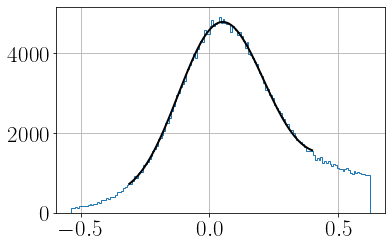

In [40]:
dvcsSimOutbCDFT.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [41]:
ub_opt, lb_opt

(0.5673014510002716, -0.47933209966527235)

In [42]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MM2_ep<0.567)&(dvcsSimOutbCDFT.MM2_ep>-0.479)]

In [43]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCDFT.MM2_eg, bins = np.linspace(0.5, 1.5, 101))
    else:
        dist, bins = np.histogram(dvcsSimOutbCDFT.MM2_eg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.908, 0.244, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.01, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.91172283  0.241381   -0.18002468 -0.12209659  0.32634782] 0.3501866593371006 1.4074587852626028 6.217248937900877e-15
[ 0.91338341  0.23148702  0.29898361 -1.20426227  0.90348236] 0.3748640746418721 1.3887996149428357 0.01483249364363426
[ 0.91245905  0.229698    0.32159554 -1.25538797  0.94257871] 0.37810158455555554 1.3842010755410528 0.07312206983255654


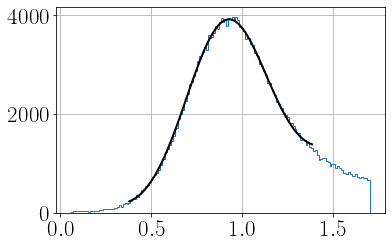

In [44]:
dvcsSimOutbCDFT.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
x = np.linspace(0.5, 1.5, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [45]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

0.22336503549104458 1.6015530625312084


In [46]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MM2_eg<1.602)&(dvcsSimOutbCDFT.MM2_eg>0.223)]

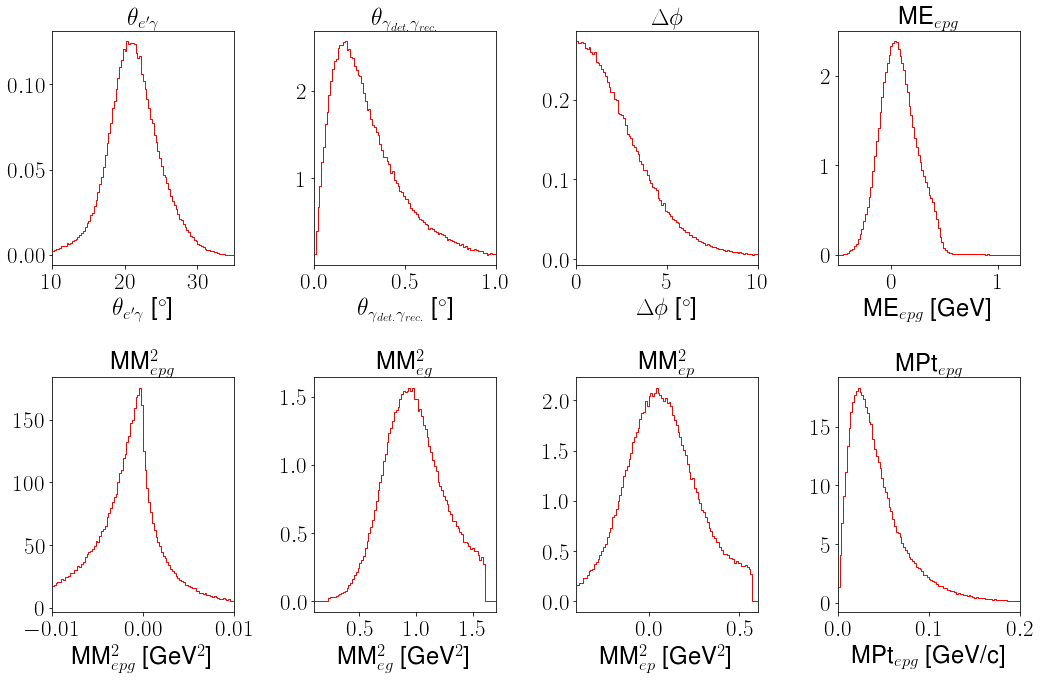

<Figure size 432x288 with 0 Axes>

In [47]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [48]:
len(dvcsSimOutbCDFT)

249097

In [49]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCDFT.ME_epg, bins = np.linspace(-0.422, 0.466, 101))
    else:
        dist, bins = np.histogram(dvcsSimOutbCDFT.ME_epg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.1, 0.14, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.02358142  0.15681531 -0.01436227  1.11550028  1.06992066] -0.2343568111533681 0.34564068056717195 7.075702169623277e-06
[ 0.02342556  0.15345077 -0.0057942   1.10576621  1.77372947] -0.22897848954520778 0.33857490113049804 0.016455336775892504
[0.02280568 0.15287692 0.00763075 1.16092028 1.69841954] -0.22865448002016892 0.3367765024622607 0.10191180494024621


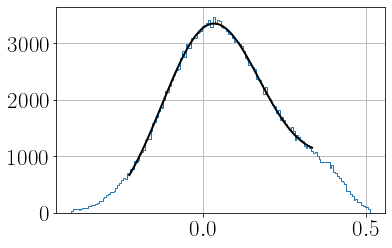

In [50]:
dvcsSimOutbCDFT.ME_epg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [51]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.43582509036128436 0.4814364592161211


In [52]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.ME_epg<0.481)&(dvcsSimOutbCDFT.ME_epg>-0.436)]

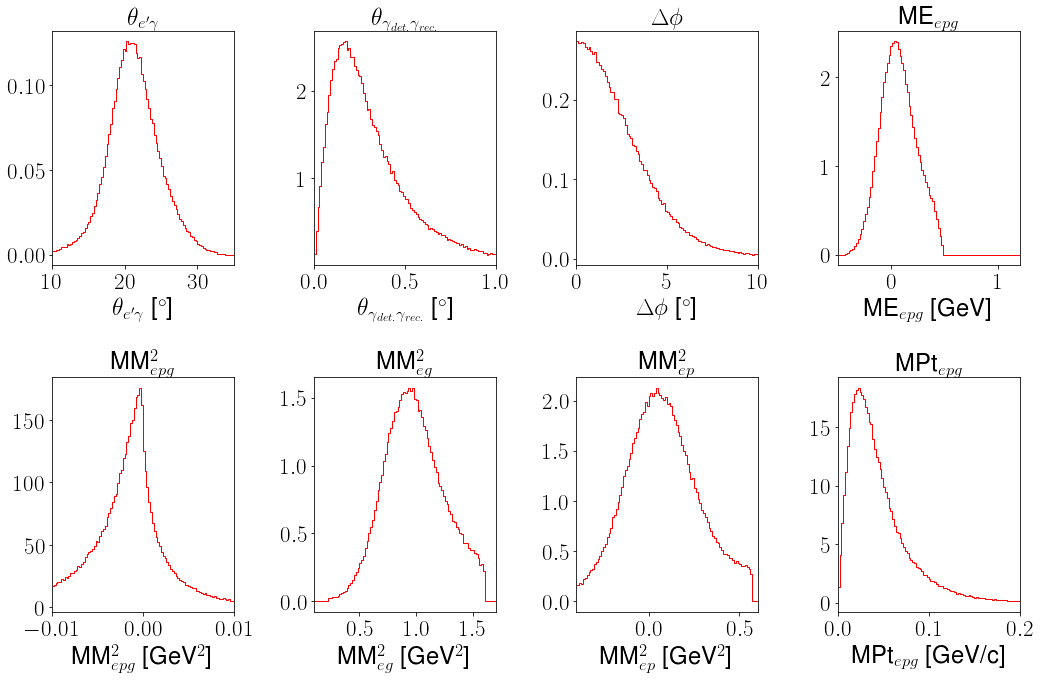

<Figure size 432x288 with 0 Axes>

In [53]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [54]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCDFT.coneAngle, bins = np.linspace(10, 30, 101))
    else:
        dist, bins = np.histogram(dvcsSimOutbCDFT.coneAngle, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [20, 5, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.96, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 2.07249947e+01  2.78830355e+00  1.22060566e-01 -1.37543584e-02
  3.82449291e-04] 16.13864348988139 25.606438880689755 0.013955314098464067
[ 2.06930506e+01  2.72213308e+00  1.24831307e-01 -1.40774819e-02
  4.01085739e-04] 16.21554007535881 25.45865102294877 0.061727357970553065
[ 2.06867224e+01  2.70443741e+00  1.27672218e-01 -1.43430172e-02
  4.10199981e-04] 16.238318747589684 25.42134334356678 0.08111601371813848


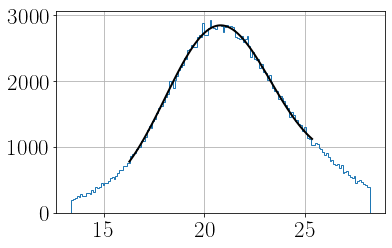

In [55]:
dvcsSimOutbCDFT.coneAngle.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [56]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

12.573410196693558 28.800034672623376


In [57]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.coneAngle<28.800)&(dvcsSimOutbCDFT.coneAngle>12.573)]

In [58]:
len(dvcsSimOutbCDFT)

238055

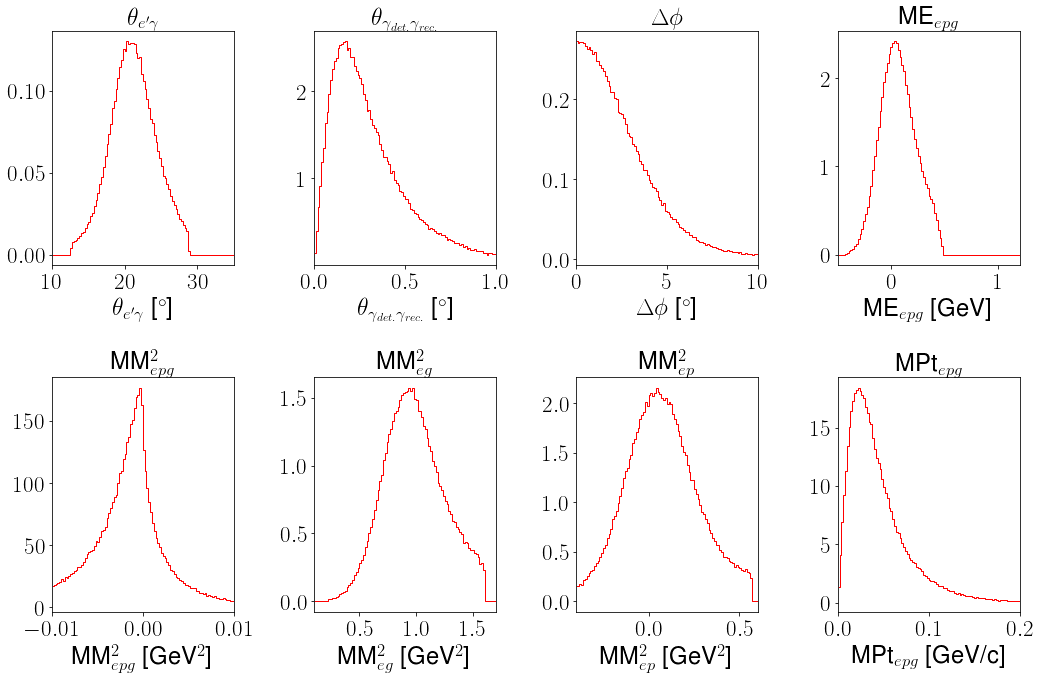

<Figure size 432x288 with 0 Axes>

In [59]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [60]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCDFT.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimOutbCDFT.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.001
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 0.001 0.10935210147080744
0.00573888948297252 0.001 0.10175343564847646
[ 3.48361548e+00  5.94193197e-03  3.19371679e-02 -5.42518159e+00
  1.91410624e+02 -1.18149792e+03] 0.001 0.10175343564847646 0.00573888948297252
0.016733324045103526 0.001 0.09987712847447015
[ 3.34612397e+00  5.82203336e-03  3.13516984e-02 -5.80143779e+00
  2.17342256e+02 -1.40896551e+03] 0.001 0.09987712847447015 0.016733324045103526
0.025349967186448552 0.001 0.09963093012077012
[ 3.33740858e+00  5.82793974e-03  3.12676635e-02 -5.81338987e+00
  2.20295829e+02 -1.43823270e+03] 0.001 0.09963093012077012 0.025349967186448552
0.02125421123264626 0.001 0.0996226820726274
0.02296120825019965 0.001 0.0996462839383954
0.023286751827361174 0.001 0.0996122281673785
0.01676020874392059 0.001 0.09961788747144998
0.02087512904169808 0.001 0.09963680379878163
0.022989642652056497 0.001 0.09964194179458433


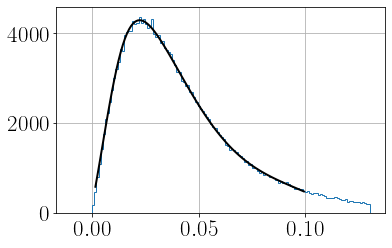

In [61]:
dvcsSimOutbCDFT.MPt.hist(bins = extendedBins(bins_opt, 10, 30), histtype = 'step')
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [62]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.09998906238691062

In [63]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MPt<0.100)]

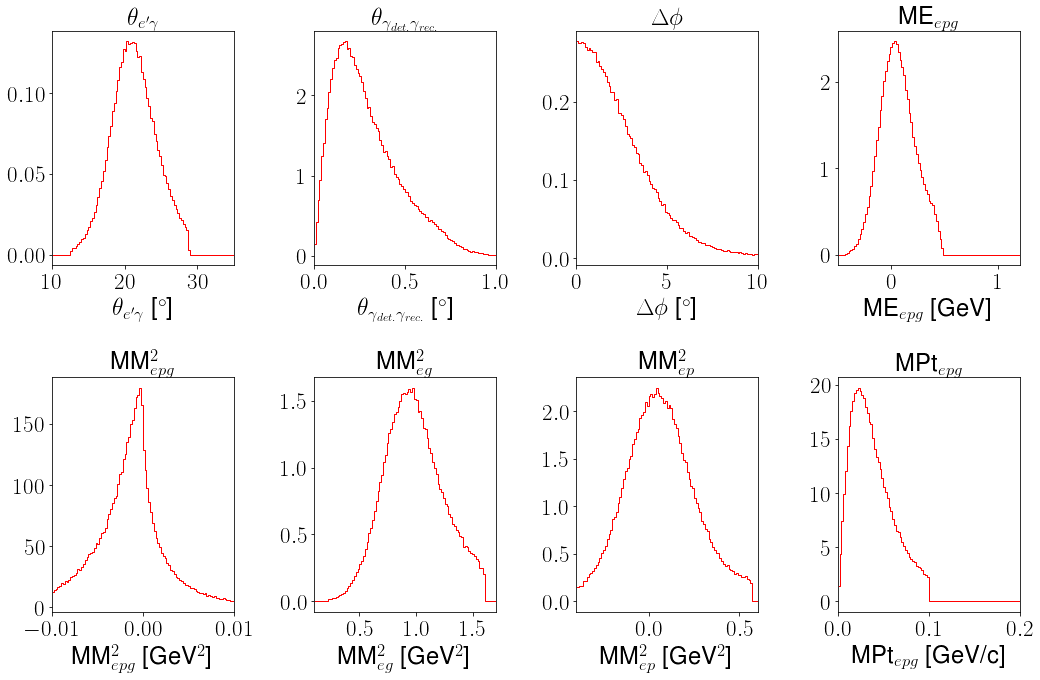

<Figure size 432x288 with 0 Axes>

In [64]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [65]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCDFT.reconGam, bins = np.linspace(0.005, 0.85, 101))
        params = [1, 0.3, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimOutbCDFT.reconGam, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.005
    ub = skewnorm.ppf(0.998, a = a, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.005 0.742803284350483 0.0
0.005 0.7140734424347701 0.31728718893296814
[ 3.10720321  0.03488557  0.21978538 -1.04643265  5.6647529  -5.38325476] 0.005 0.7140734424347701 0.31728718893296814
0.005 0.7104385594741595 0.1563151370885284
0.005 0.7100123556856801 0.22071231975506866
0.005 0.7099072591568786 0.2735652487293274
0.005 0.7098880501435317 0.3003332348942632
0.005 0.710011630302336 0.3107703840499023
0.005 0.7098953664467605 0.27488671036220813
0.005 0.7099535194394749 0.29422983654213397
0.005 0.7098122818864235 0.3020243169887058


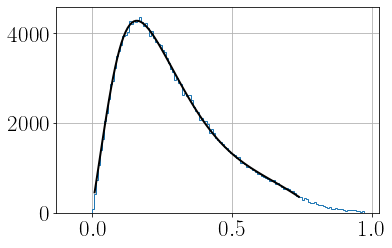

In [66]:
dvcsSimOutbCDFT.loc[:, "reconGam"].hist(bins = extendedBins(bins_opt, 10, 30), histtype = 'step')
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [67]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.69675906957469

In [68]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.reconGam<0.697]

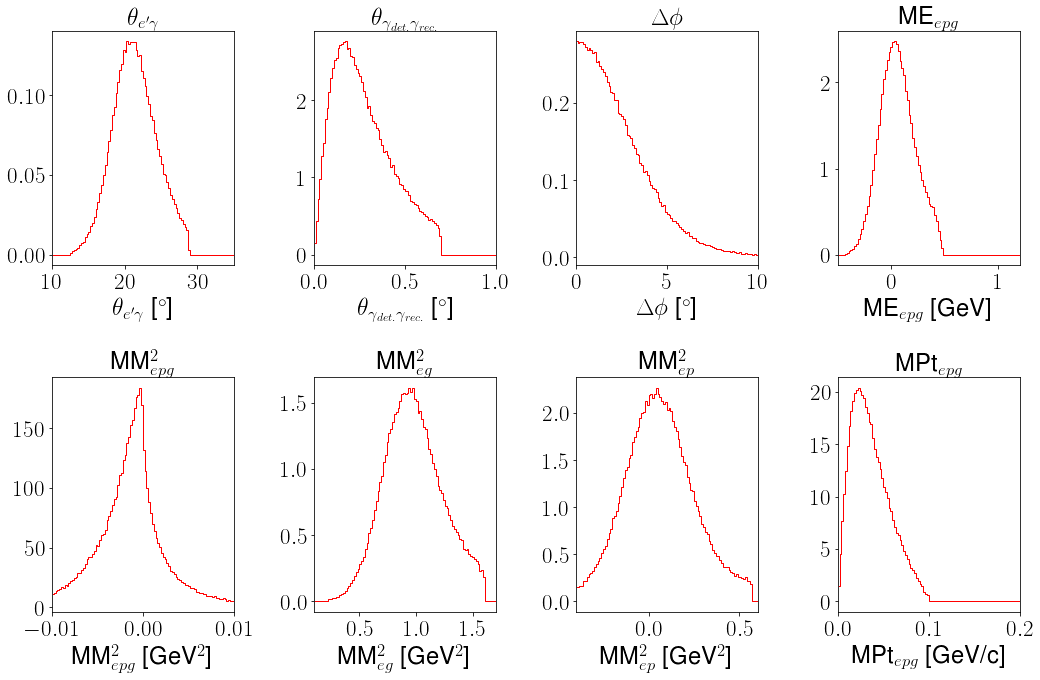

<Figure size 432x288 with 0 Axes>

In [69]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 1.2, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [70]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCDFT.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimOutbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 6.777396504970733 1.3297228284359086e-05
[ 2.71095860e+00 -2.06084262e-02  7.64257923e-03 -5.27471717e-04] 0 6.777396504970733 1.3297228284359086e-05
0 7.029469012250946 0.09326015731166393
[ 2.81178760e+00  5.14729591e-03 -3.25691457e-03  5.38222997e-04] 0 7.029469012250946 0.09326015731166393
0 7.065243450258613 0.21607664546172878
[ 2.82609738e+00  5.19119423e-03 -3.57599464e-03  5.59054487e-04] 0 7.065243450258613 0.21607664546172878
0 7.065451809714325 0.13131646588003665
0 7.0655906575392935 0.10523377911638143
0 7.065473803314269 0.10874957661027529
0 7.065482266246477 0.11357274672666373
0 7.0654956244307785 0.11708229085657573
0 7.065543745348261 0.10948726542288623
0 7.06553338581248 0.12082318736334319


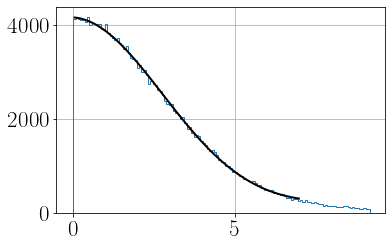

In [71]:
dvcsSimOutbCDFT.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [72]:
3*scale

8.478640062974977

In [73]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[dvcsSimOutbCDFT.coplanarity<8.479]

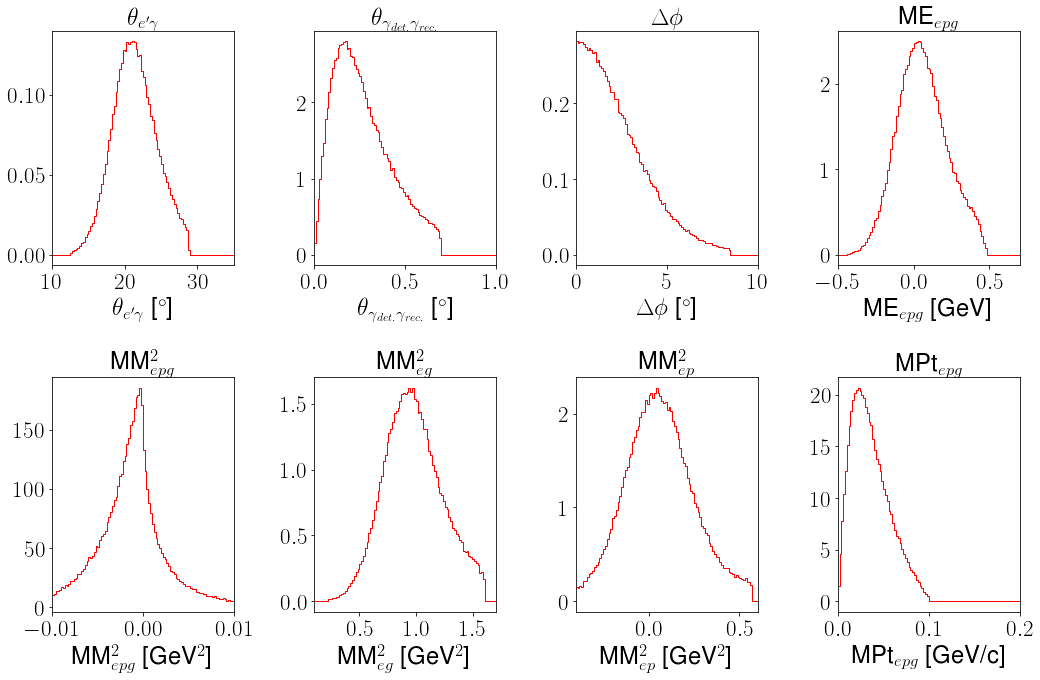

<Figure size 432x288 with 0 Axes>

In [74]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [75]:
dvcsSimOutbCDFT.MM2_epg.mean()+3*dvcsSimOutbCDFT.MM2_epg.std()

0.012760894711273982

In [76]:
dvcsSimOutbCDFT.MM2_epg.mean()-3*dvcsSimOutbCDFT.MM2_epg.std()

-0.01553931390834986

In [77]:
dvcsSimOutbCDFT = dvcsSimOutbCDFT.loc[(dvcsSimOutbCDFT.MM2_epg<0.0128)&(dvcsSimOutbCDFT.MM2_epg>-0.0155)]

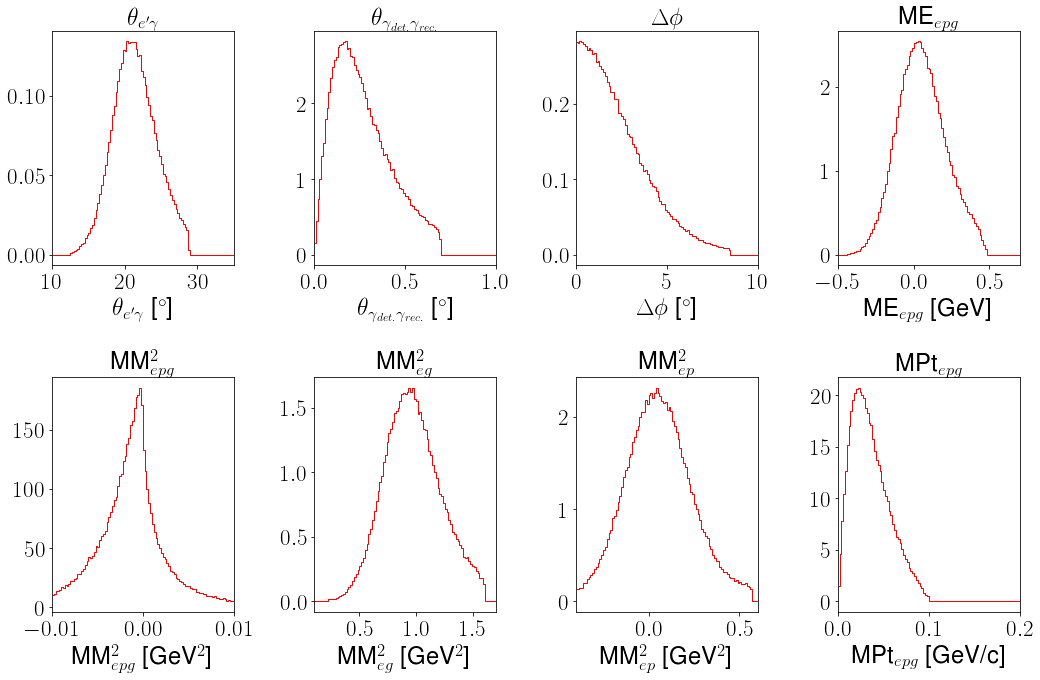

<Figure size 432x288 with 0 Axes>

In [78]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCDFT[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [79]:
len(dvcsSimOutbCDFT)

205549

## CDFD cuts

In [80]:
dvcsSimOutbCD = dvcsSimOutb.loc[dvcsSimOutb.config == 2]

In [81]:
len(dvcsSimOutbCD)

801678

In [82]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCD.MM2_ep, bins = np.linspace(-0.6, 0.6, 101))
        params = [0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimOutbCD.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0, 0.3, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.03, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        dist_opt = dist
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.01174492  0.11863767 -0.03922944  1.11665711 10.72043252] -0.21138804581710016 0.2068865187203924 0.002384796035618586
[1.09692341e-02 1.16419872e-01 7.70314221e-03 1.25127516e+00
 1.18385191e+01] -0.20799251758756698 0.2024628833122008 0.021590615581544625
[1.06745863e-02 1.15791429e-01 2.34992331e-02 1.30648607e+00
 1.21648685e+01] -0.20710519269349567 0.2011345377092026 0.20193720374385382
[1.06403590e-02 1.15657924e-01 2.93288294e-02 1.31650771e+00
 1.22095267e+01] -0.2068883246791668 0.20088071437932103 0.4018552085948732
[1.06760198e-02 1.15666439e-01 3.17239476e-02 1.31296733e+00
 1.21428675e+01] -0.20686867916464446 0.20093038138207003 0.4087975391162356


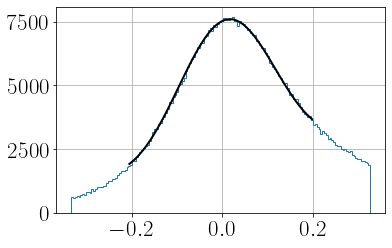

In [83]:
dvcsSimOutbCD.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [84]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.3363232969181134 0.35767533655804523


In [85]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.MM2_ep<0.358)&(dvcsSimOutbCD.MM2_ep>-0.336)]

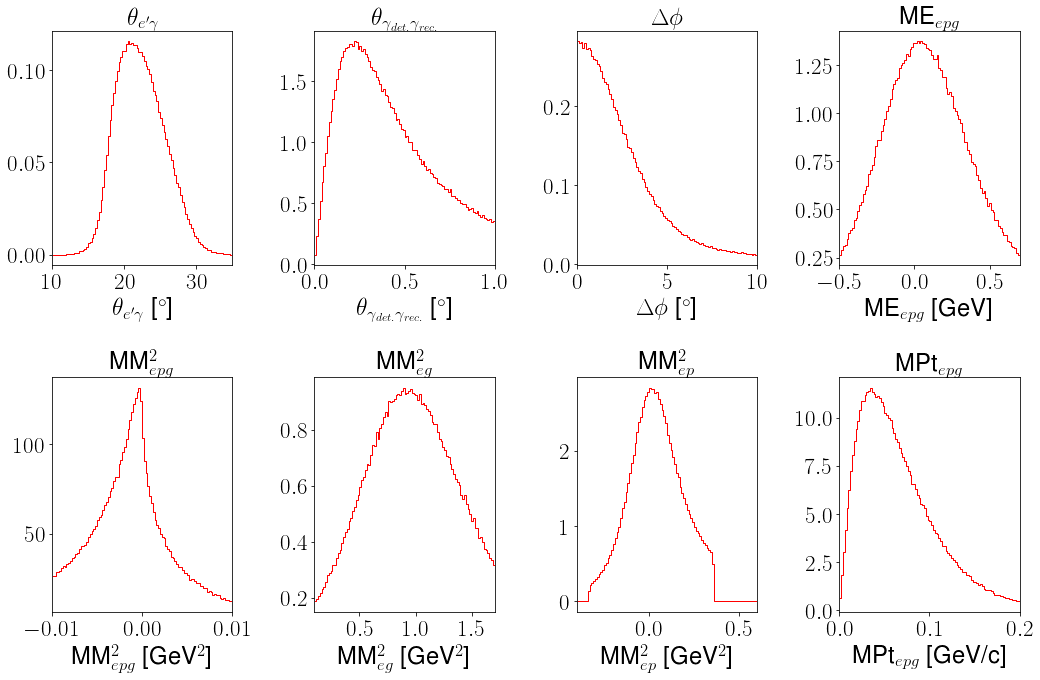

<Figure size 432x288 with 0 Axes>

In [86]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [87]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        params = [0.908, 0.5, -0.471, 0.526, 0]
    else:
        dist, bins = np.histogram(dvcsSimOutbCD.MM2_eg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, hist))
    params = res_lsq.x
    loc, scale, a, b, c = params
    lb = norm.ppf(0.01, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 0.91692364  0.44451279  0.01052773 -0.10723608  0.0997192 ] -0.1171677435764531 1.6480821065419682 1.5608625503205076e-12
[ 0.91124065  0.43500917  0.02380008 -0.12030235  0.11704732] -0.10074201803512084 1.626767067174995 0.000719865861740554
[ 0.90994827  0.43283094  0.02708542 -0.12266228  0.1208772 ] -0.0969670748812187 1.6218918219364618 0.005372085954521655
[ 0.90988421  0.43240056  0.02803237 -0.12257429  0.12106314] -0.09602990422732349 1.6211198288230395 0.007575356975112024
[ 0.9098121   0.43231112  0.02814881 -0.12264349  0.12122072] -0.09589396435824937 1.620900619747196 0.009084267826473202
[ 0.90984503  0.4323158   0.02815829 -0.12235097  0.1210149 ] -0.09587192198599881 1.6209412495475568 0.012423499171704266
[ 0.90982164  0.43230591  0.02815973 -0.12248644  0.12112195] -0.09587229005058506 1.620901574952102 0.014008546915208808
[ 0.90981943  0.43230667  0.02815595 -0.12247451  0.12111592] -0.09587627236262375 1.6209006305952416 0.014210269831157474


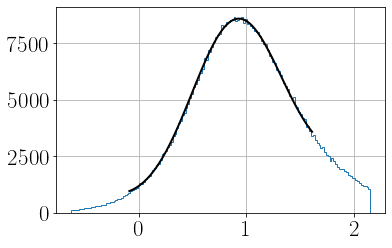

In [88]:
dvcsSimOutbCD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [89]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.38710058072022313 2.206739448594152


In [90]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.MM2_eg<2.207)&(dvcsSimOutbCD.MM2_eg>-0.387)]
# bkgSimOutbCD = bkgSimOutbCD.loc[(bkgSimOutbCD.MM2_eg<2.217)&(bkgSimOutbCD.MM2_eg>-0.387)]

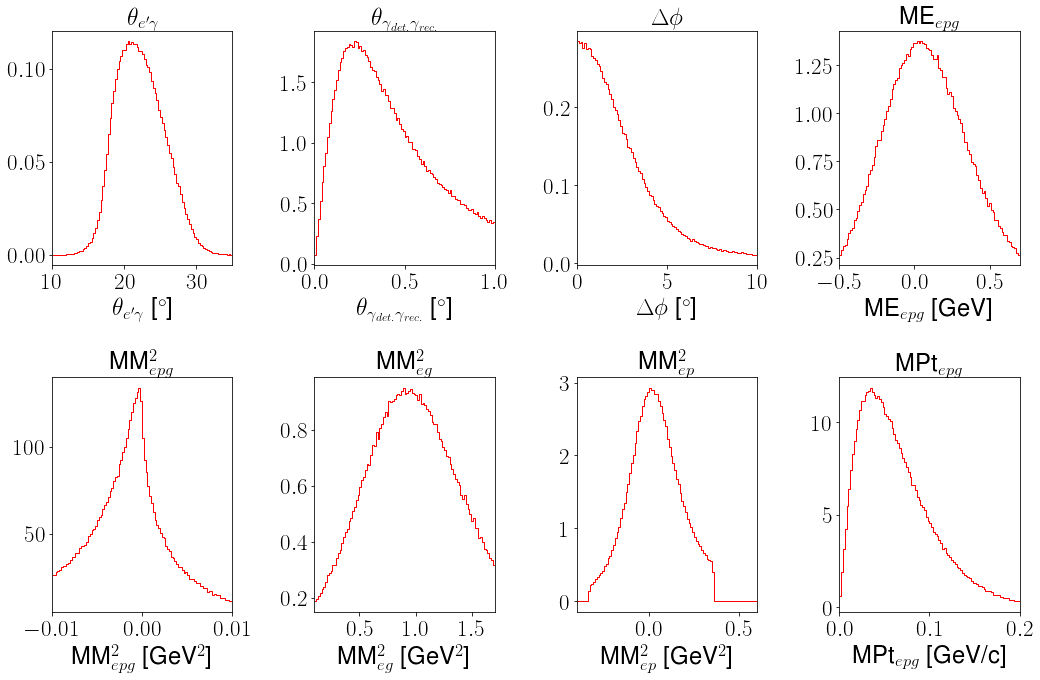

<Figure size 432x288 with 0 Axes>

In [91]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [92]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCD.ME_epg, bins = np.linspace(-0.8, 0.8, 101))
    else:
        dist, bins = np.histogram(dvcsSimOutbCD.ME_epg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.1, 0.14, -0.471, 0.526, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.03, loc = loc, scale = scale)
    ub = norm.ppf(0.97, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[0.03313347 0.28934244 0.00432705 0.14049533 0.28257707] -0.5110599451980934 0.5773268895618918 0.0016882039807897264
[0.03171164 0.28635584 0.0174363  0.15508931 0.30193083] -0.5068645884350783 0.57028786379786 0.010860153292810204
[0.0315311  0.28567673 0.02115356 0.1574875  0.30366153] -0.5057678751785593 0.5688300780183083 0.017364538148286424
[0.03153232 0.285653   0.02134698 0.15746613 0.30353024] -0.5057220158848046 0.5687866494478755 0.022017920342602415
[0.03153487 0.28564771 0.02134411 0.15743891 0.30363051] -0.5057095159410238 0.5687792650953538 0.02331567251734812


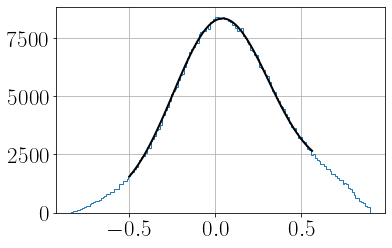

In [93]:
dvcsSimOutbCD.ME_epg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [94]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.825408260793674 0.8884780099480042


In [95]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.ME_epg<0.888)&(dvcsSimOutbCD.ME_epg>-0.825)]

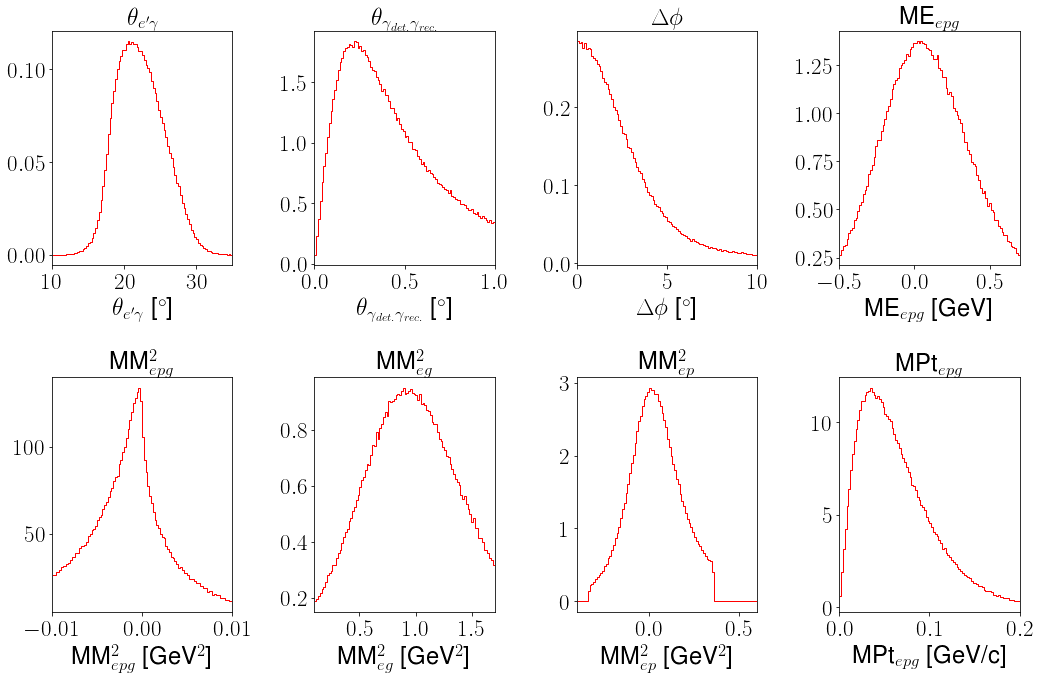

<Figure size 432x288 with 0 Axes>

In [96]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [97]:
len(dvcsSimOutbCD)

605607

In [98]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCD.coneAngle, bins = np.linspace(16, 28, 101))
        params = [22, 5, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimOutbCD.coneAngle, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, params, args=(bincenters, hist))
    params = res_lsq.x
    loc, scale, a, b, c = params
    lb = norm.ppf(0.2, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

[ 1.88461478e+01  3.72359828e+00 -1.27958762e+00  1.10820030e-01
 -2.29460796e-03] 15.712288438447025 26.493483729926524 7.09432512735475e-14
[ 1.85237947e+01  3.61290025e+00 -1.52103425e+00  1.32536036e-01
 -2.76264106e-03] 15.483101120742099 25.943784638979885 0.00025532253617099876
[ 1.85309791e+01  3.64661005e+00 -1.54990213e+00  1.36040574e-01
 -2.85163506e-03] 15.461914689951765 26.020200554379542 0.0057897302277946094


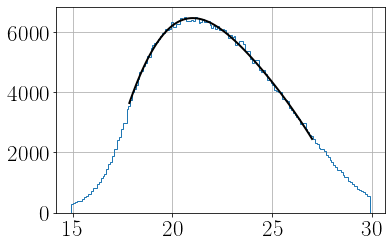

In [99]:
dvcsSimOutbCD.coneAngle.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [100]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

7.591148990007902 29.47080928607231


In [101]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.coneAngle<29.471)&(dvcsSimOutbCD.coneAngle>7.591)]

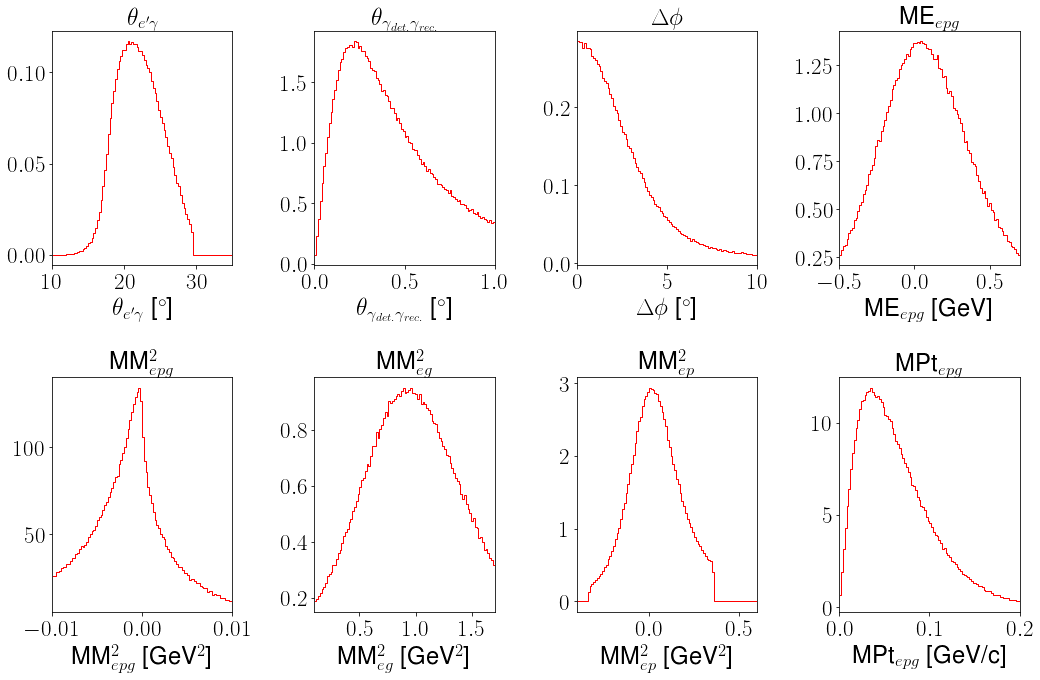

<Figure size 432x288 with 0 Axes>

In [102]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [103]:
len(dvcsSimOutbCD)

595676

In [104]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCD.MPt, bins = np.linspace(0.004, 0.2, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimOutbCD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.01
    ub = loc + 3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 0.01 0.18504816074253624
0.00029190801400846844 0.01 0.18324718576639035
[ 4.42704207e+00  9.98633844e-03  5.77536158e-02 -7.52707790e-01
  2.46444854e+01 -1.02171037e+02] 0.01 0.18324718576639035 0.00029190801400846844
0.009875036809412818 0.01 0.1829051069091807
[ 4.41666768e+00  9.95388062e-03  5.76504088e-02 -7.83262298e-01
  2.55469429e+01 -1.06382652e+02] 0.01 0.1829051069091807 0.009875036809412818
0.034078954313983334 0.01 0.18278437319692328
[ 4.40715351e+00  9.94431286e-03  5.76133534e-02 -7.92316160e-01
  2.58117756e+01 -1.07603871e+02] 0.01 0.18278437319692328 0.034078954313983334
0.00736597741367917 0.01 0.18279740579463052
0.008051174597071054 0.01 0.18281304051018432
0.016160427691499946 0.01 0.18279458681719757
0.008255021642937121 0.01 0.18280838264345822
0.013616996904915135 0.01 0.18280363934994776
0.01028867454033533 0.01 0.18280939779059419


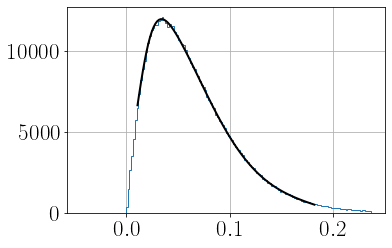

In [105]:
dvcsSimOutbCD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [106]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.18344426263364988

In [107]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.MPt<0.183)]

In [108]:
len(dvcsSimOutbCD)

583710

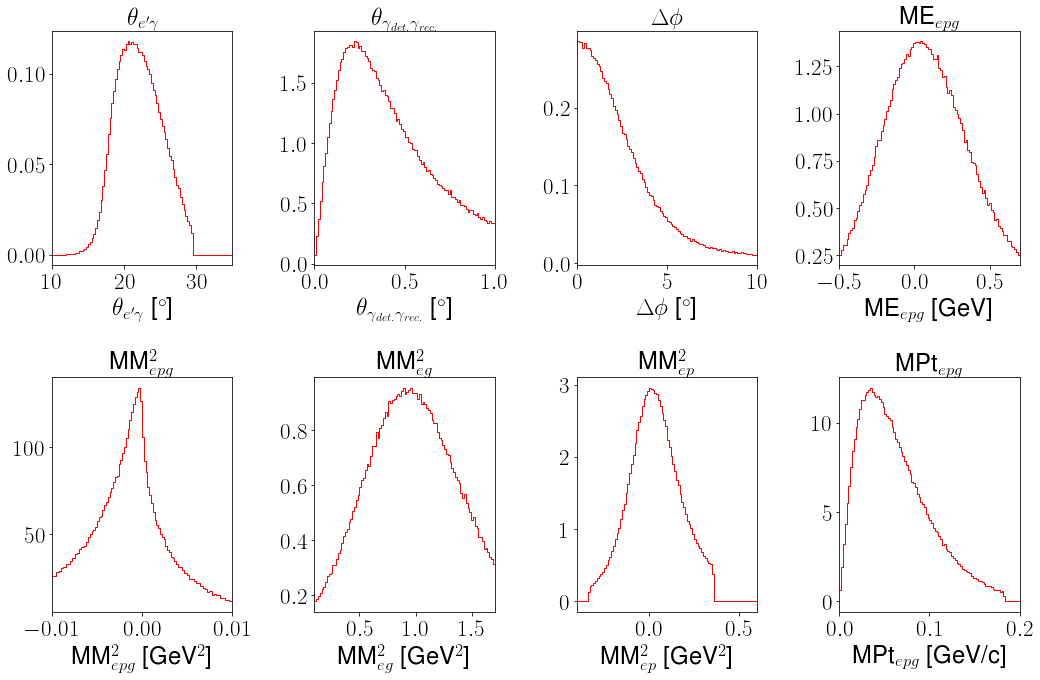

<Figure size 432x288 with 0 Axes>

In [109]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [110]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCD.reconGam, bins = np.linspace(0.01, 1.2, 101))
        params = [10, 0.3, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimOutbCD.reconGam, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.001
    ub = skewnorm.ppf(0.995, a = a, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(i, lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 0.001 0.995921234521458 1.0658141036401503e-13
[ 3.98359734  0.03897029  0.3409118  -0.71120239  2.24930504 -1.25611635] 0.001 0.995921234521458 1.0658141036401503e-13
1 0.001 0.9257513684747775 0.04664357333581037
[ 3.48607892  0.0346982   0.31743586 -0.85201293  3.17511311 -2.04005224] 0.001 0.9257513684747775 0.04664357333581037
2 0.001 0.9009544251909158 0.12388910407293852
[ 3.31006266  0.03333207  0.30908868 -0.89979814  3.57527158 -2.41503748] 0.001 0.9009544251909158 0.12388910407293852
3 0.001 0.891863205233605 0.5329945717807476
[ 3.25565513  0.03280797  0.30603666 -0.91881132  3.7401232  -2.5743934 ] 0.001 0.891863205233605 0.5329945717807476
4 0.001 0.8929143154367165 0.018831165833486208
5 0.001 0.8925063345270016 0.04304719824725378
6 0.001 0.8927787541652431 0.0698766019008239
7 0.001 0.8921558213785306 0.022161643609444948
8 0.001 0.8929147769757024 0.02737559823681046
9 0.001 0.8925007156415165 0.04227433382789236


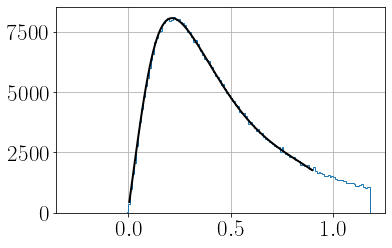

In [111]:
dvcsSimOutbCD.reconGam.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [112]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.9544232161420895

In [113]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.reconGam<0.954)]

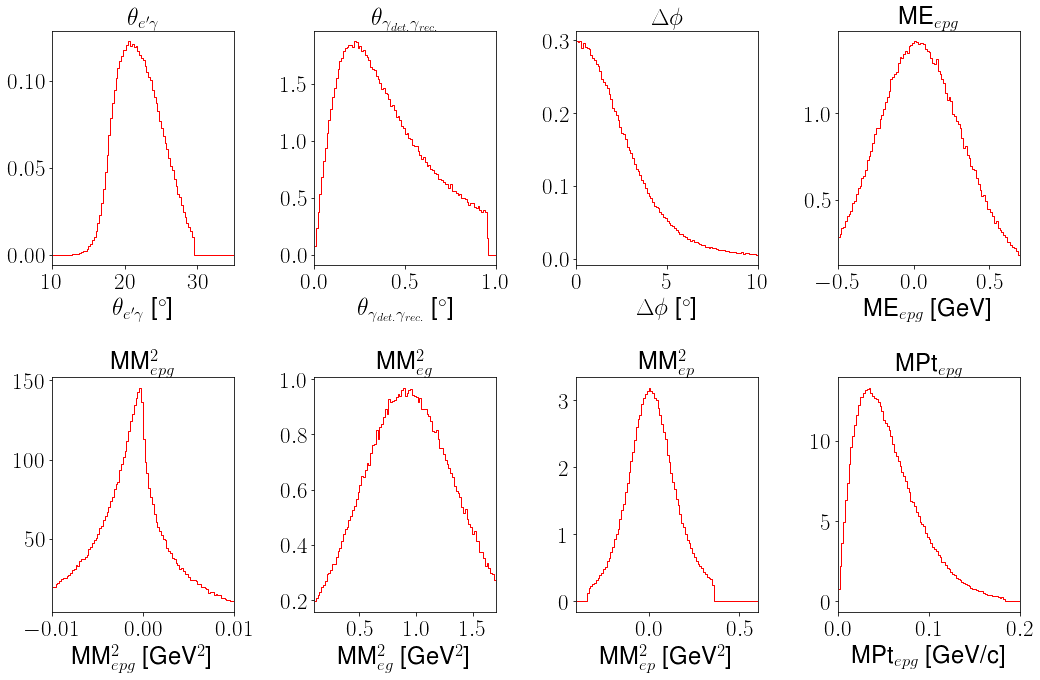

<Figure size 432x288 with 0 Axes>

In [114]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [115]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(dvcsSimOutbCD.coplanarity, bins = np.linspace(0, 7, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(dvcsSimOutbCD.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 5.296414520222294 0.0
0 4.977010343036371 0.3494135458834816
[ 2.48850517e+00  5.17832441e-03 -3.87285452e-03  1.21555167e-03] 0 4.977010343036371 0.3494135458834816
0 4.913445328484564 0.5021524493060316
[ 2.45672266e+00  6.51610877e-03 -2.83587350e-03  1.10641744e-03] 0 4.913445328484564 0.5021524493060316
0 4.897978378255032 0.7196695346048189
[ 2.44898919e+00  6.64607395e-03 -2.49845984e-03  1.07040277e-03] 0 4.897978378255032 0.7196695346048189
0 4.897042393891516 0.42782512792152694
0 4.896945468984356 0.3412479013436065
0 4.896858138513486 0.3179653683802717
0 4.896957140703143 0.30641951721540506
0 4.896843352506622 0.3203792009181121
0 4.897055371574478 0.3032685181110071


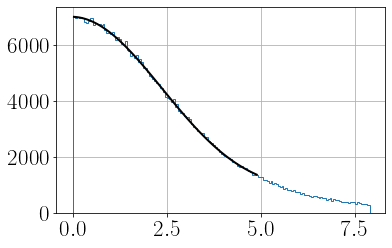

In [116]:
dvcsSimOutbCD.coplanarity.hist(bins = extendedBins(bins_opt, 0, 60), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [117]:
print(3*params_opt[0])

7.346967567382547


In [203]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.coplanarity<7.347)]

In [118]:
print(dvcsSimOutbCD.MM2_epg.mean()-3*dvcsSimOutbCD.MM2_epg.std(), dvcsSimOutbCD.MM2_epg.mean()+3*dvcsSimOutbCD.MM2_epg.std())

-0.02414556916723903 0.021073940131626407


In [119]:
dvcsSimOutbCD = dvcsSimOutbCD.loc[(dvcsSimOutbCD.MM2_epg<0.0211)&(dvcsSimOutbCD.MM2_epg>-0.0241)]

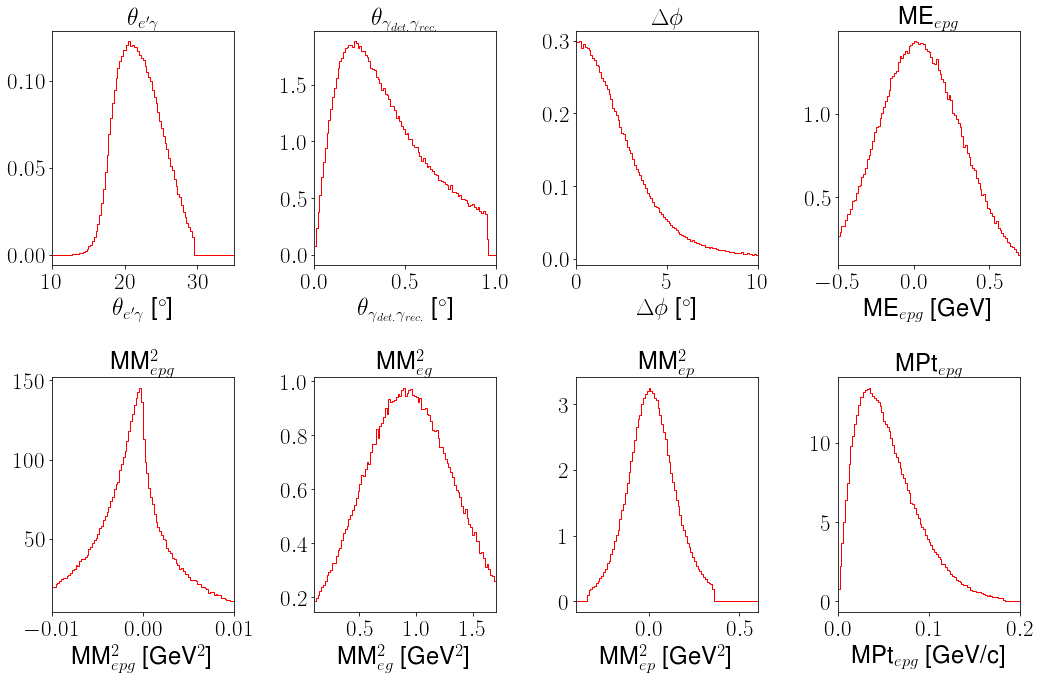

<Figure size 432x288 with 0 Axes>

In [120]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [10, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [35, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbCD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [121]:
len(dvcsSimOutbCD)

474645

## FDFD cuts

In [117]:
dvcsSimOutbFD = dvcsSimOutb.loc[dvcsSimOutb.config == 1]
bkgSimOutbFD = bkgSimOutb.loc[bkgSimOutb.config == 1]

In [118]:
contOutbFD = 0.36

In [119]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.MM2_ep, bins = np.linspace(-0.4, 0.4, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, [0, 0.3, 0, 0, 0], args=(bincenters, simDist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 367.18742900877294 95
9.796694055985711e-08 184.8315997889695 95
[ 0.01252049  0.15233269 -0.21913882  0.25225644  6.69690924] -0.30033260317002397 0.32537358501754393 9.796694055985711e-08
8.30483915076341e-05 155.87830460131266 95
[ 0.01216061  0.14715482 -0.2118921   0.25232745  8.00066651] -0.2900584552472617 0.31437966634735254 8.30483915076341e-05
0.0041045336743995575 135.418656463966 95
[ 0.01154216  0.14498633 -0.20377047  0.28797009  8.55361387] -0.2862233622865707 0.3093076735169057 0.0041045336743995575
3.863644400792232e-05 159.4688087249112 95
2.9923886829319457e-05 160.64548739724967 95
0.0007359639191505396 144.97358798181452 95
0.010522138122557645 129.64817373840432 95
[ 0.01034198  0.14276595 -0.20643974  0.35832377  9.334401  ] -0.282863429253224 0.30354738948576077 0.010522138122557645
0.004372896838050311 135.0444711999645 95
0.003896452155400576 135.7246710368383 95


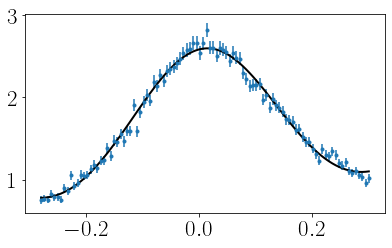

In [120]:
# dvcsSimInbFD.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [121]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.4179558626993214 0.4386398229318582


In [122]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.MM2_ep<0.439)&(dvcsSimOutbFD.MM2_ep>-0.418)]
bkgSimOutbFD = bkgSimOutbFD.loc[(bkgSimOutbFD.MM2_ep<0.439)&(bkgSimOutbFD.MM2_ep>-0.418)]

In [123]:
len(dvcsSimOutbFD)

39800

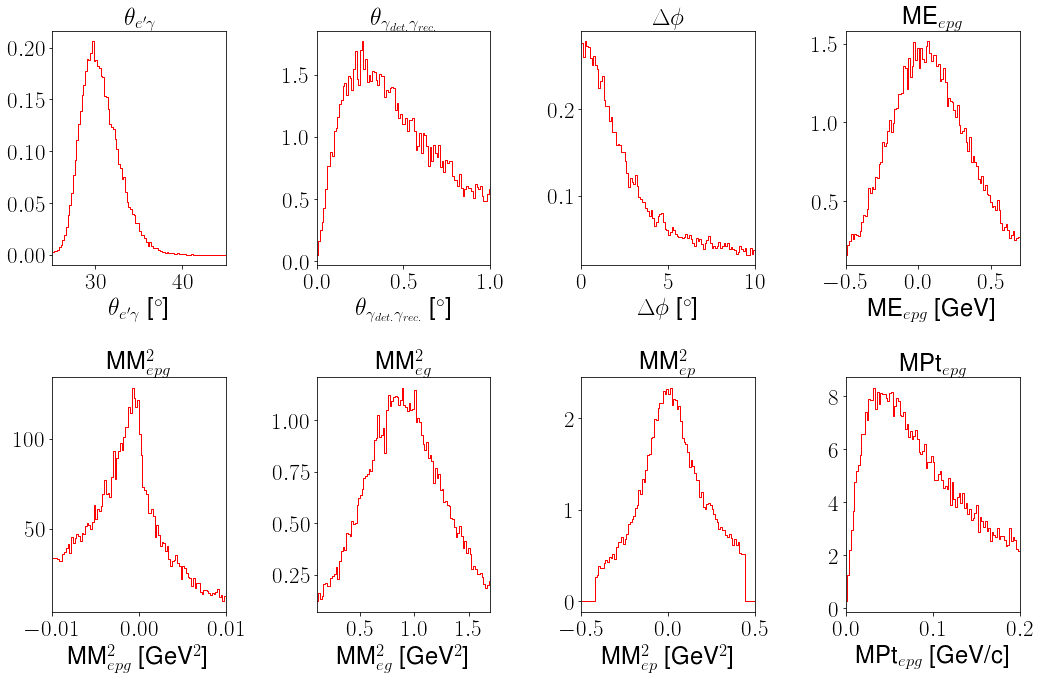

<Figure size 432x288 with 0 Axes>

In [124]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1, -0.5 , 0]
binends = [45, 1, 10, 0.7, 0.01, 1.7, 0.5, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [125]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.MM2_eg, bins = np.linspace(-0.5, 2.5, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.MM2_eg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.MM2_eg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, [0, 0.3, 0, 0, 0], args=(bincenters, simDist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.97, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 1710.2448184080606 95
3.02900432735953e-07 180.32639058094597 95
[ 0.9355221   0.40025374 -0.01547956 -0.22093932  0.20746801] 0.11350141064038988 1.6883167866621573 3.02900432735953e-07
7.007750064713658e-05 156.6841859009963 95
[ 0.92735469  0.38445248  0.01630263 -0.30734713  0.28148188] 0.13778582193698774 1.650430467099111 7.007750064713658e-05
0.007367486689062286 131.88847978584892 95
[ 0.92364104  0.37917048  0.02790218 -0.34378921  0.31347997] 0.1449200804288613 1.636782460727886 0.007367486689062286
0.002098750081629408 139.27619140677297 95
0.00271266343087595 137.82225223563438 95
0.0025269383918923305 138.22670007695245 95
0.010738414333524737 129.5180055357255 95
[ 0.92198667  0.375638    0.04111462 -0.38076194  0.340577  ] 0.15052054394410852 1.628484221094605 0.010738414333524737
0.011900834456655907 128.85646221535075 95
[ 0.92190783  0.37556215  0.04164983 -0.38299402  0.34196605] 0.15059747429851011 1.628262719220651 0.011900834456655907
0.01790557075503385 126.1

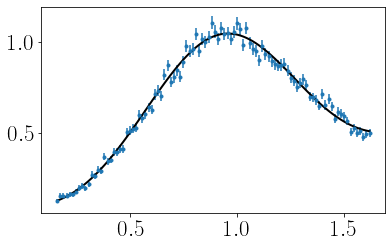

In [126]:
# dvcsSimInbFD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [127]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.20479456514229932 2.0486823881487655


In [128]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.MM2_eg<2.049)&(dvcsSimOutbFD.MM2_eg>-0.205)]
bkgSimOutbFD = bkgSimOutbFD.loc[(bkgSimOutbFD.MM2_eg<2.049)&(bkgSimOutbFD.MM2_eg>-0.205)]

In [129]:
len(dvcsSimOutbFD)

38298

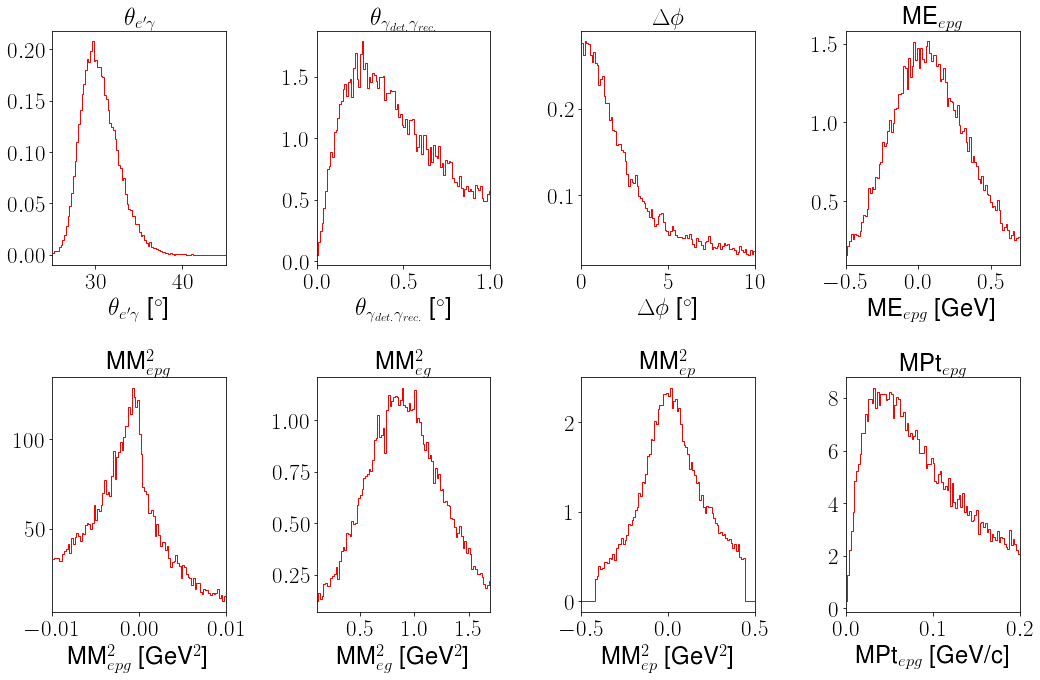

<Figure size 432x288 with 0 Axes>

In [130]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1, -0.5 , 0]
binends = [45, 1, 10, 0.7, 0.01, 1.7, 0.5, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [131]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.ME_epg, bins = np.linspace(-1, 1, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.ME_epg, bins = np.linspace(-1, 1, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.ME_epg, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.ME_epg, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, [0, 0.3, 0, 0, 0], args=(bincenters, simDist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.97, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

<ipython-input-22-36f1c948bc16>:7: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 95
2.2783307129792263e-08 190.50572891394216 95
[ 0.08538783  0.30582078 -0.06941619  0.26797442  0.45273574] -0.5426912584426894 0.6605735903861798 2.2783307129792263e-08
0.0007009360037104617 145.23030135765075 95
[ 0.07785531  0.2933115  -0.06828207  0.32808509  0.66654386] -0.5245328557346771 0.6295137011849494 0.0007009360037104617
0.13889054865574024 110.027909670872 95
[ 0.07550245  0.29049454 -0.05672065  0.36194918  0.69489821] -0.5211003848534361 0.6218627180717929 0.13889054865574024
0.025534586955668237 123.7090886119852 95
0.02981816609620247 122.60551076481916 95
0.025672108692682438 123.67123111801422 95
0.01970466558339634 125.50661898726928 95
0.025244419617138636 123.78955561190251 95
0.016891714260820256 126.54938149589066 95


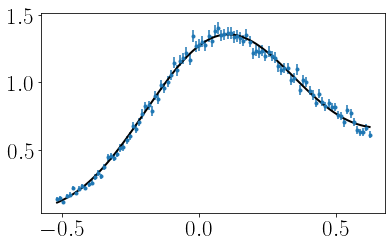

In [132]:
# dvcsSimInbFD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [133]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

-0.795981155892896 0.9469860594347037


In [134]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.ME_epg<0.947)&(dvcsSimOutbFD.ME_epg>-0.796)]
bkgSimOutbFD = bkgSimOutbFD.loc[(bkgSimOutbFD.ME_epg<0.947)&(bkgSimOutbFD.ME_epg>-0.796)]

In [135]:
len(dvcsSimOutbFD)

38063

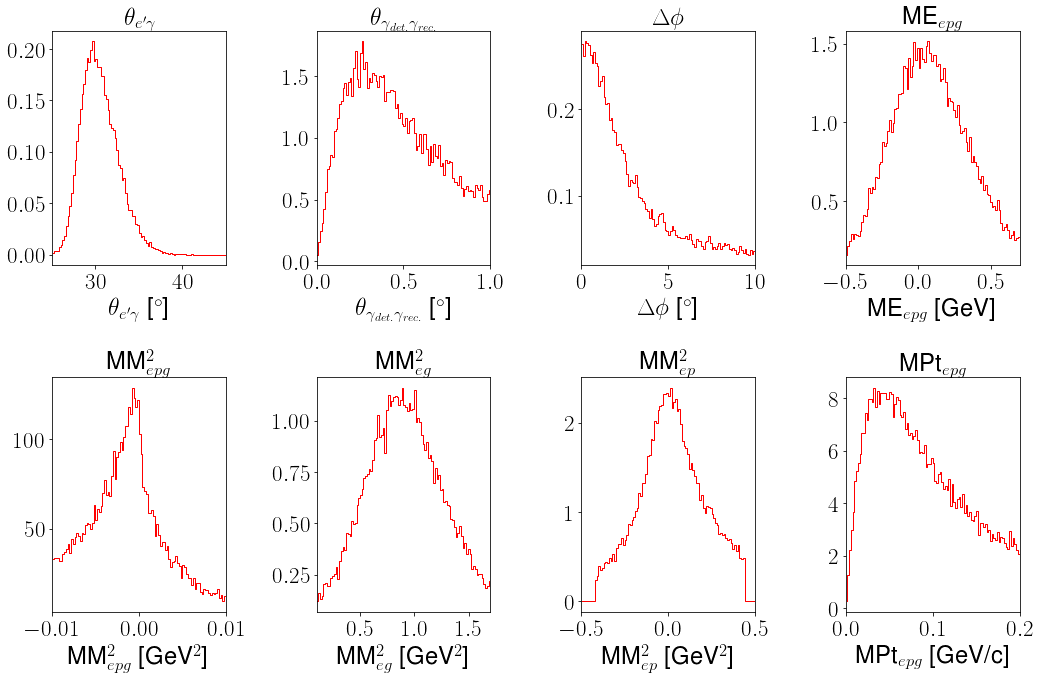

<Figure size 432x288 with 0 Axes>

In [136]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1, -0.5 , 0]
binends = [45, 1, 10, 0.7, 0.01, 1.7, 0.5, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [137]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.coneAngle, bins = np.linspace(25, 38, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.coneAngle, bins = np.linspace(25, 38, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.coneAngle, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.coneAngle, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_normfit, [31, 5, 0, 0, 0], args=(bincenters, simDist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.96, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(simDist, bins,  normfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0 4523.543347625231 95
0.0 386.3351111701579 95
7.915093469534895e-07 176.40411175557506 95
[ 2.95616342e+01  1.76171364e+00  1.05199527e+00 -8.49822306e-02
  1.67435472e-03] 25.943516720975587 32.64584172078764 7.915093469534895e-07
0.00017243216809215145 152.34709986463886 95
[ 2.95267242e+01  1.73072969e+00  1.42614550e+00 -1.12004114e-01
  2.16165687e-03] 25.972239974150483 32.55668856023647 0.00017243216809215145
0.03330270393049861 121.8051908335924 95
[ 2.95055220e+01  1.71289592e+00  1.68933982e+00 -1.30917821e-01
  2.50058263e-03] 25.98766388251133 32.50426502772738 0.03330270393049861
0.023591005528648346 124.26415420583386 95
0.17229018205618718 107.91075326358533 95
[ 2.94908399e+01  1.70040204e+00  1.86151451e+00 -1.43377349e-01
  2.72565371e-03] 25.998641107771544 32.467710104742466 0.17229018205618718
0.07751527173003803 115.22449628671072 95
0.078368501318263 115.13279360607196 95
0.07376380491796641 115.63764167644925 95


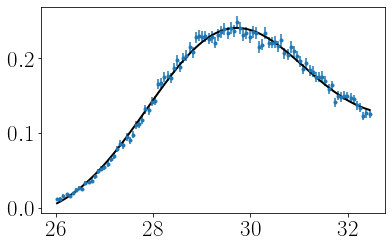

In [138]:
# dvcsSimInbFD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [139]:
print(params_opt[0]-3*params_opt[1], params_opt[0]+3*params_opt[1])

24.389633826866383 34.592046055397695


In [141]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.coneAngle>24.390)&(dvcsSimOutbFD.coneAngle<34.592)]
bkgSimOutbFD = bkgSimOutbFD.loc[(bkgSimOutbFD.coneAngle>24.390)&(bkgSimOutbFD.coneAngle<34.592)]

In [142]:
len(dvcsSimOutbFD)

36155

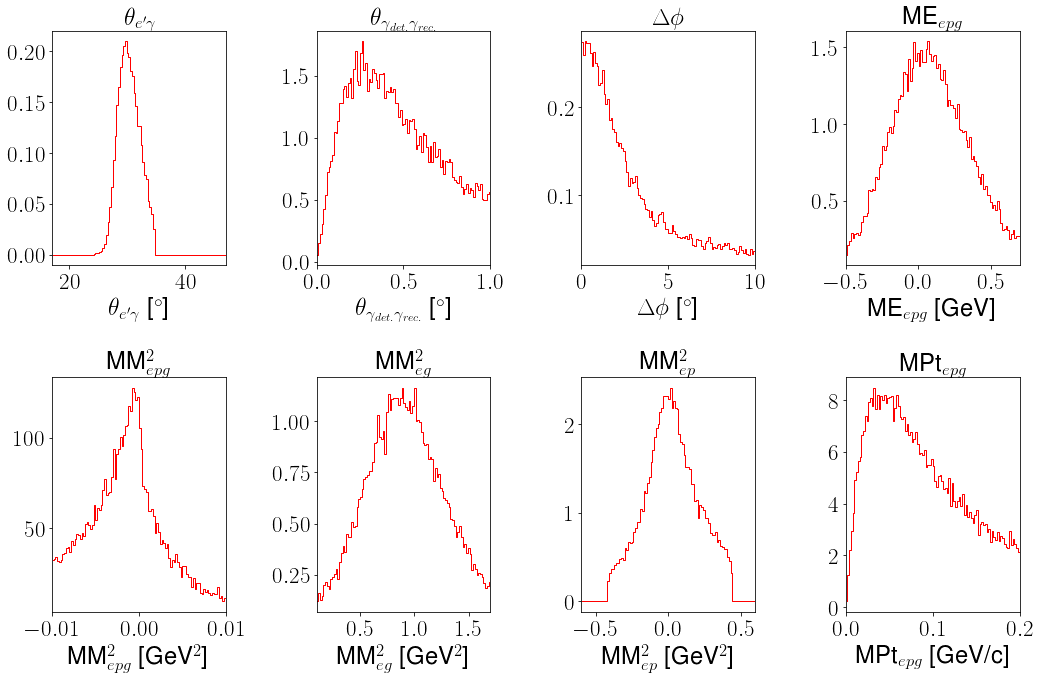

<Figure size 432x288 with 0 Axes>

In [143]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [17, 0, 0, -0.5, -0.01, 0.1,-0.6 , 0]
binends = [47, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [144]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.MPt, bins = np.linspace(0.05, 0.3, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.MPt, bins = np.linspace(0.05, 0.3, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.MPt, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.MPt, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_skewnormfit, [1, 0, 0.03, 0, 0, 0], args=(bincenters, simDist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.005
    ub = loc + 3.5*scale
    pvalue, chi2fit, dof = probFit(simDist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = ub
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.4657319555609454 94.51344522387535 94
[  5.5793962   -0.13084722   0.08462845   9.85734873 -41.9636782
  37.84004412] 0.005 0.16535234157754952 0.4657319555609454
0.9748888631990512 69.08881326450624 94
[ 2.87667829e+00 -3.36988755e-03  6.29158221e-02 -6.58107104e+00
  1.46096805e+02 -5.07958045e+02] 0.005 0.21683548972792765 0.9748888631990512
0.5604862233041139 91.27134106753255 94
0.0004384552827224608 146.42461525826502 94
0.0 268.5923144747419 94
2.220446049250313e-16 251.67063891814058 94
0.0 264.02655623976233 94
1.1102230246251565e-16 254.6928721968112 94
0.0 258.37730953506485 94
0.0 260.5336980637261 94


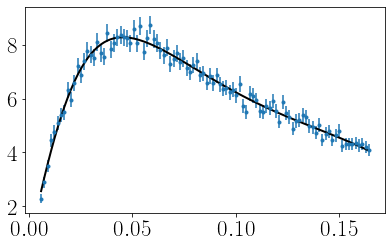

In [145]:
# dvcsSimInbFD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [146]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.18609820132004404

In [147]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.MPt<0.186)]
bkgSimOutbFD = bkgSimOutbFD.loc[(bkgSimOutbFD.MPt<0.186)]

In [148]:
len(dvcsSimOutbFD)

29578

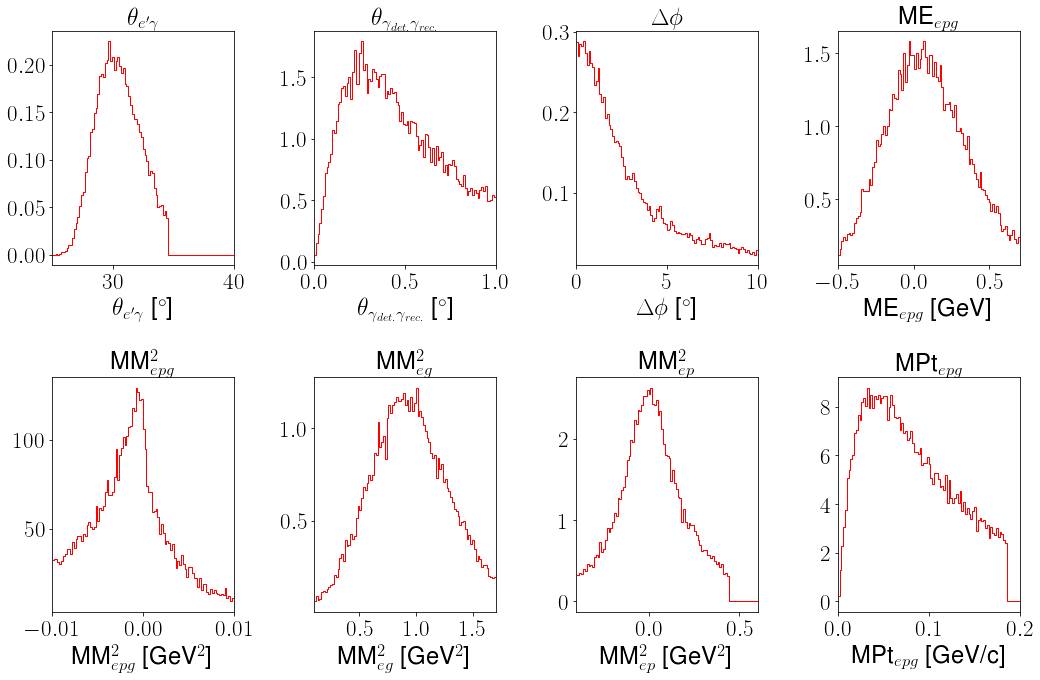

<Figure size 432x288 with 0 Axes>

In [149]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [150]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.reconGam, bins = np.linspace(0.05, 2, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.reconGam, bins = np.linspace(0.05, 2, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.reconGam, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.reconGam, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = loc*0.3
    ub = loc + 3.5*scale
    pvalue, chi2fit, dof = probFit(simDist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = ub
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.022615086705808807 123.41221697745273 94
[ 4.7477274   0.02939892  0.54820266 -0.57531262  1.06659275 -0.34786891] 0.008819675958237934 1.9481082367560107 0.022615086705808807
0.13865068819822213 108.96509814746302 94
[ 4.82601285  0.03008252  0.54308179 -0.59819863  1.12098627 -0.3717337 ] 0.009024756538653948 1.9308687852657673 0.13865068819822213
0.03046082101257308 121.31540160942757 94
0.10428345032883635 111.57439659894091 94
0.13540202209783836 109.18934853403437 94
0.09984600954247025 111.95769299639882 94
0.08981534281140069 112.87603276288505 94
0.10196932610449283 111.77266383612698 94
0.1133653133567113 110.82775847528788 94
0.19911441651637207 105.3497037488048 94
[ 4.8234506   0.0304742   0.54171803 -0.59831388  1.12862314 -0.37588731] 0.00914226077535173 1.926487312743504 0.19911441651637207


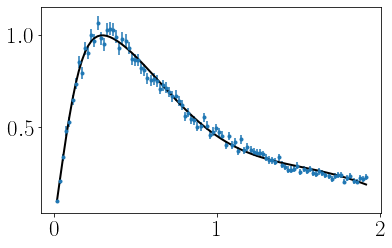

In [151]:
# dvcsSimInbFD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = unc_opt, linestyle = '', marker = '.')
# plt.errorbar(bincenters, simDist, yerr = uncDist, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
# plt.plot(bincenters, skewnormfit(params, bincenters), 'k-', lw=2, label='frozen pdf')
plt.show()

In [152]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.6618330045139798

In [153]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.reconGam<1.662)]
bkgSimOutbFD = bkgSimOutbFD.loc[(bkgSimOutbFD.reconGam<1.662)]

In [154]:
len(dvcsSimOutbFD)

23862

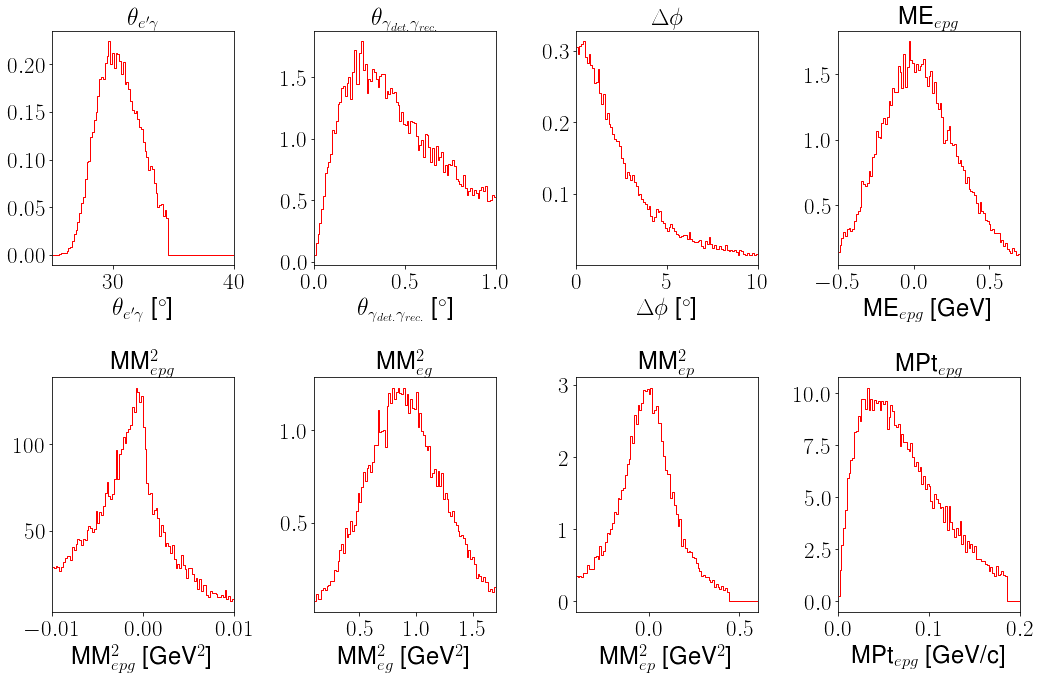

<Figure size 432x288 with 0 Axes>

In [155]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [156]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.coplanarity, bins = np.linspace(0, 7, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.coplanarity, bins = np.linspace(0, 7, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
        params = [10, 0, 0, 0]
    else:
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD.coplanarity, bins = np.linspace(lb, ub, 101))
        simDist_dvpi0, bins = np.histogram(bkgSimOutbFD.coplanarity, bins = np.linspace(lb, ub, 101))
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        simDist = (1-contOutbFD)*simDist_dvcs/np.sum(simDist_dvcs)/np.diff(bincenters)[0] + contOutbFD*simDist_dvpi0/np.sum(simDist_dvpi0)/np.diff(bincenters)[0]
        uncDist = np.sqrt((1-contOutbFD)**2*simDist_dvcs/np.sum(simDist_dvcs)**2 + contOutbFD**2*simDist_dvpi0/np.sum(simDist_dvpi0)**2)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, simDist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = loc + 2.5*scale
    pvalue, chi2fit, dof = probFit(simDist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq, hist = simDist, unchist = uncDist)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = ub
        dist_opt = simDist
        unc_opt = uncDist
        print(params_opt, lb, ub, pvalue)

0.0031626968380739084 138.1375530509715 96
[ 3.88002813  0.09641635 -0.05001392  0.00543719] 0 9.730544515285354 0.0031626968380739084
0.0 285.7497504985976 96
0.0 inf 96
0.0 inf 96


<ipython-input-22-36f1c948bc16>:7: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 96
0.0 inf 96
0.0 inf 96
0.0 inf 96
0.0 inf 96
0.0 inf 96


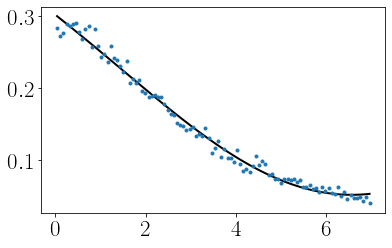

In [157]:
# dvcsSimInbFD.MM2_eg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')
plt.errorbar(bincenters_opt, dist_opt, yerr = 0, linestyle = '', marker = '.')
# df = 4.5
# scale = 0.065
# plt.plot(bincenters, normfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
# x = np.linspace(-0.4, 0.4, 100)
# plt.plot(bincenters, halfnormfit(params, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt), 'k-', lw=2, label='frozen pdf')
plt.show()

In [158]:
halfnorm.ppf(0.9974, scale = params_opt[0])

11.684525280357988

In [159]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.coplanarity<11.685)]
bkgSimOutbFD = bkgSimOutbFD.loc[(bkgSimOutbFD.coplanarity<11.685)]

In [167]:
# len(dvcsSimOutbFD.loc[(dvcsSimOutbFD.coplanarity<10.95)])

In [160]:
mu1 = dvcsSimOutbFD.MM2_epg.mean()
mu2 = bkgSimOutbFD.MM2_epg.mean()
sigma1 = dvcsSimOutbFD.MM2_epg.std()
sigma2 = bkgSimOutbFD.MM2_epg.std()
w1 = (1-contOutbFD)/len(dvcsSimOutbFD)/ ((1-contOutbFD)/len(dvcsSimOutbFD)+(contOutbFD)/len(bkgSimOutbFD))
w2 = (contOutbFD)/len(bkgSimOutbFD)/ ((1-contOutbFD)/len(dvcsSimOutbFD)+(contOutbFD)/len(bkgSimOutbFD))

In [161]:
mu = w1*mu1 + w2*mu2
print(mu)

-0.0026135828550352316


In [163]:
sigma = np.sqrt(w1**2*sigma1**2 + w2**2*sigma2**2)/np.sqrt(w1**2+ w2**2)

In [164]:
print(mu + 3*sigma, mu - 3*sigma)

0.029392399349586713 -0.03461956505965718


In [168]:
dvcsSimOutbFD.MM2_epg.mean()+5*dvcsSimOutbFD.MM2_epg.std()

0.07666681527713702

In [229]:
dvcsSimOutbFD.MM2_epg.mean()-5*dvcsSimOutbFD.MM2_epg.std()

-0.07957332454963995

In [169]:
dvcsSimOutbFD = dvcsSimOutbFD.loc[(dvcsSimOutbFD.MM2_epg<0.0767)&(dvcsSimOutbFD.MM2_epg>-0.0796)]

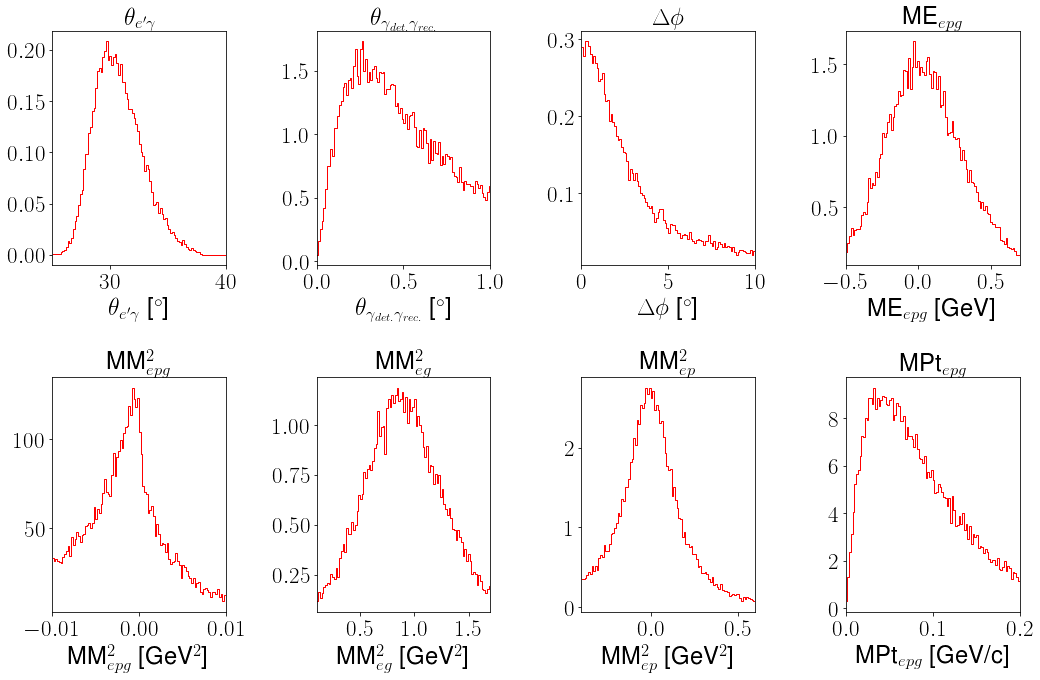

<Figure size 432x288 with 0 Axes>

In [170]:
varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{epg}$", "MM"+r"${}^{2}_{epg}$", "MM"+r"${}^{2}_{eg}$", "MM"+r"${}^{2}_{ep}$", "MPt"+r"${}_{epg}$"]
unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
binstarts = [25, 0, 0, -0.5, -0.01, 0.1,-0.4 , 0]
binends = [40, 1, 10, 0.7, 0.01, 1.7, 0.6, 0.2]
fig, axs = plt.subplots(2, 4, figsize = (15,10))
for yind in range(0, 2):
    for xind in range(0,4):
        ind = 4*yind + xind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        simDist_dvcs, bins = np.histogram(dvcsSimOutbFD[varstoplot[ind]], bins, density = True)
        bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
        axs[yind, xind].step(bincenters, simDist_dvcs, where='mid',color='r', linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
# axs[0,2].set_xticks([2.2, 2.7, 3.2])
# axs[1,0].set_xticks([0.29, 0.32, 0.35, 0.38])
# axs[1,1].set_xticks([0.23, 0.3, 0.39, 0.52])
# axs[1,2].set_xticks([0, 90, 180, 270, 360])
plt.tight_layout()
# plt.savefig("kineFD.pdf")
# plt.savefig("analysisnote/outbending1.pdf")
plt.show()
plt.clf()

In [171]:
len(dvcsSimOutbFD)

30523

## Refining π0 cuts

In [219]:
parent_epgg = "/Volumes/Extreme SSD/nov2021/convPkl_FDrevisited/outb/epgg/"
epgg_4243 = pd.read_pickle(parent_epgg + "4243" + "_epgg.pkl")

In [220]:
pi0SimOutb = copy(epgg_4243)

In [221]:
pi0SimOutbFD = pi0SimOutb.loc[pi0SimOutb.config == 1]

In [222]:
pi0SimOutbFD.Gp2.min()

0.6000003694503024

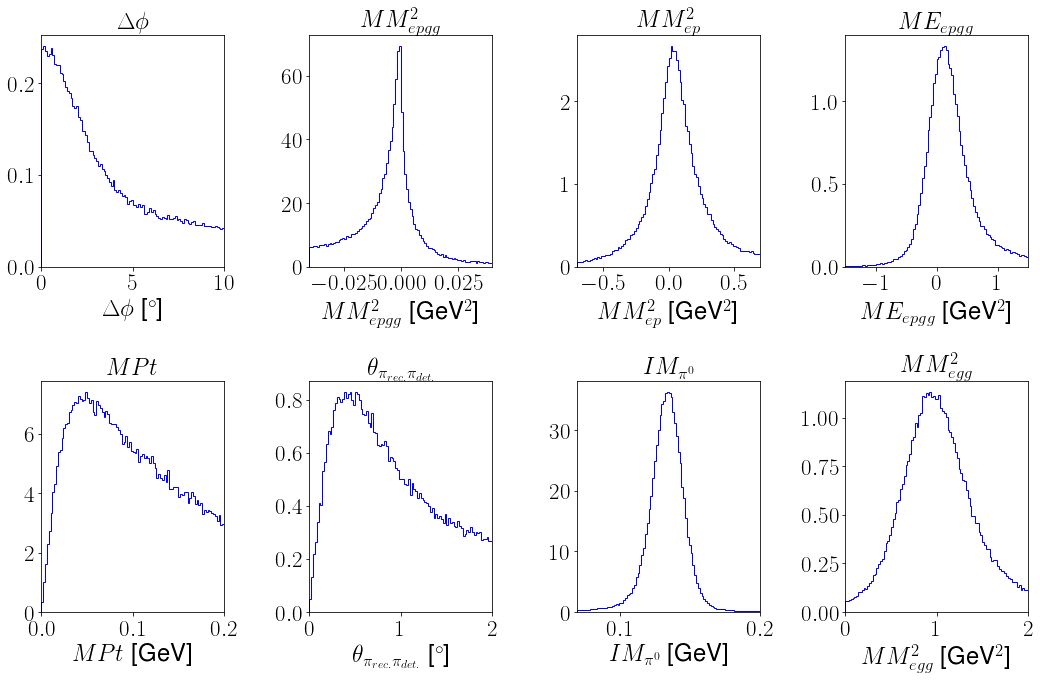

In [223]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [224]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbFD.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimOutbFD.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 6085.080411415537 95
0.2935896877193689 101.98493385561126 95
[ 1.34258707e-01  9.76108696e-03  6.98444746e+01 -9.71836779e+02
  3.45198437e+03] 0.1182031475635433 0.150314266128219 0.2935896877193689
0.6607116452703501 88.75923256737495 95
[ 1.34359583e-01  9.77803604e-03 -3.93708680e+01  7.09701594e+02
 -2.91420626e+03] 0.11827614467047758 0.15044302075211996 0.6607116452703501
0.6869416771922756 87.80331685244232 95
[ 1.34331602e-01  9.76591708e-03 -3.33125873e+01  6.11735030e+02
 -2.52413630e+03] 0.11826809810337308 0.15039510637228704 0.6869416771922756
0.8314931540273451 81.76144858904607 95
[ 1.34345054e-01  9.77261210e-03 -3.81170599e+01  6.87075381e+02
 -2.81614383e+03] 0.11827053764599255 0.15041957055579758 0.8314931540273451
0.7453973310410538 85.56089411003536 95
0.7446187603681975 85.59207600273685 95
0.7987798098236947 83.30274830535083 95
0.7809500473031118 84.08652635296015 95
0.8291029943983507 81.8794329545547 95


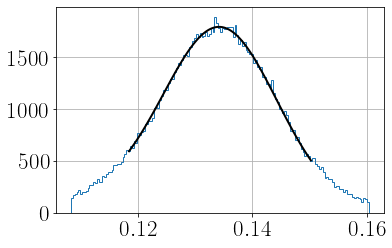

In [225]:
pi0SimOutbFD.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [226]:
print(ub_opt, lb_opt)

0.16366289039620346 0.10502721780558667


In [227]:
pi0SimOutbFD = pi0SimOutbFD.loc[(pi0SimOutbFD.Mpi0<0.164) & (pi0SimOutbFD.Mpi0>0.105)]

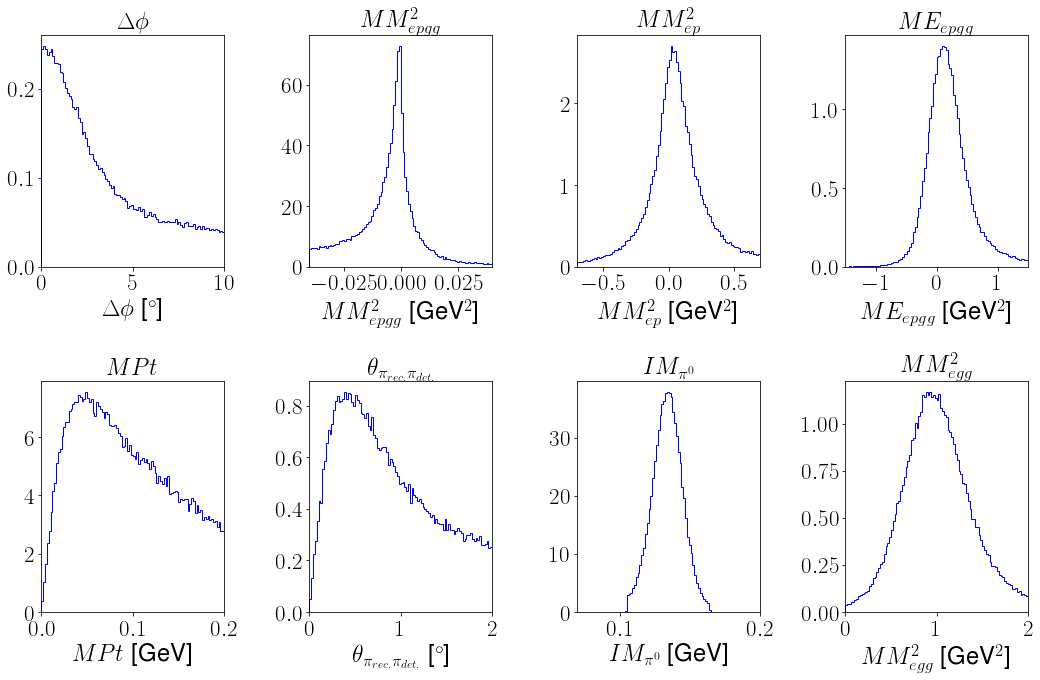

In [228]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [233]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbFD.MM2_ep, bins = np.linspace(-0.5, 0.5, 101))
    else:
        dist, bins = np.histogram(pi0SimOutbFD.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.03, loc = loc, scale = scale)
    ub = norm.ppf(0.97, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 4201.746616292614 95
0.0 339.87627823149427 95
1.2450236789307567e-06 174.52346554365425 95
[ 0.03415488  0.10407067 -0.24932401 -0.86157617 21.55587127] -0.16158057548096225 0.2298903345392107 1.2450236789307567e-06
0.04438584320196726 119.66585513345898 95
[ 0.03359991  0.09960779 -0.21305324 -1.09456045 27.02471857] -0.15374178881505318 0.2209416126601961 0.04438584320196726
0.02746490367659493 123.19325204698367 95
0.0062132329260804475 132.9345252583104 95
0.016302074591120874 126.7873816440344 95
0.07903404932123126 115.06181951258006 95
[ 0.03335783  0.09659299 -0.17593771 -1.3109161  31.48942468] -0.14831364756467796 0.2150292976627047 0.07903404932123126
0.1246899429162639 111.04248583823676 95
[ 0.03348036  0.09657927 -0.1711289  -1.33277692 31.4187158 ] -0.1481653074453599 0.21512603306613381 0.1246899429162639
0.18126990683905875 107.39202798538393 95
[ 0.03348508  0.09650516 -0.17328929 -1.34609508 31.5996937 ] -0.14802121591391412 0.2149913767584679 0.1812699068390587

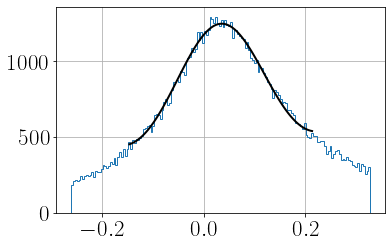

In [234]:
pi0SimOutbFD.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [235]:
print(ub_opt, lb_opt)

0.32300057358891654 -0.2560304127443628


In [236]:
pi0SimOutbFD = pi0SimOutbFD.loc[(pi0SimOutbFD.MM2_ep<0.323) & (pi0SimOutbFD.MM2_ep>-0.256)]

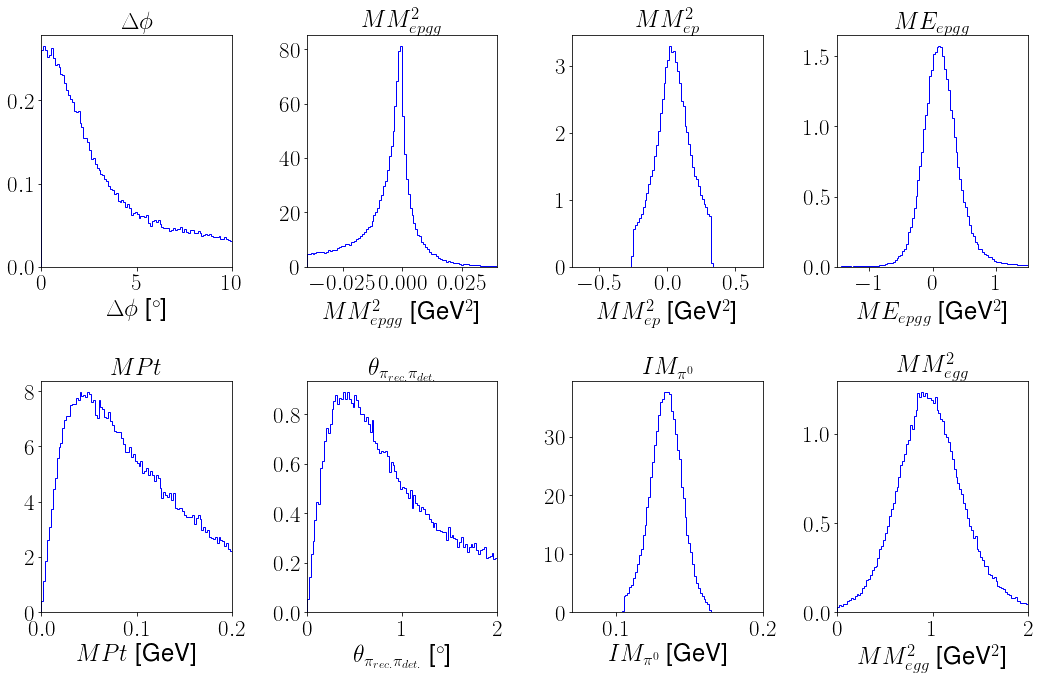

In [237]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [240]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbFD.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimOutbFD.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 501.4696670279921 95
0.9825049276049138 68.27304057684852 95
[ 0.93873101  0.29655847  0.11573955 -0.25728465  0.19646531] 0.4509357322854568 1.4265262929897884 0.9825049276049138
0.9016318848093878 77.7056640112818 95
0.9341836013601235 75.12322080664694 95
0.8538618578184771 80.6064563010635 95
0.935137141778506 75.03505342109173 95
0.8729404568974377 79.53349622064138 95
0.9184587566913169 76.46090543564158 95
0.8596720059824929 80.28936622537323 95
0.9486944618399512 73.66532015510396 95


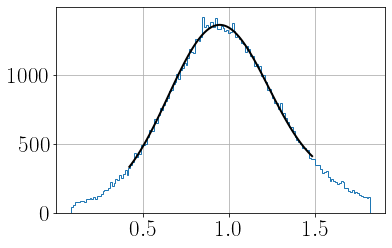

In [241]:
pi0SimOutbFD.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [243]:
print(ub_opt, lb_opt)

1.8284064324308704 0.049055592844374996


In [244]:
pi0SimOutbFD = pi0SimOutbFD.loc[(pi0SimOutbFD.MM2_egg<1.828) & (pi0SimOutbFD.MM2_egg>0.0491)]

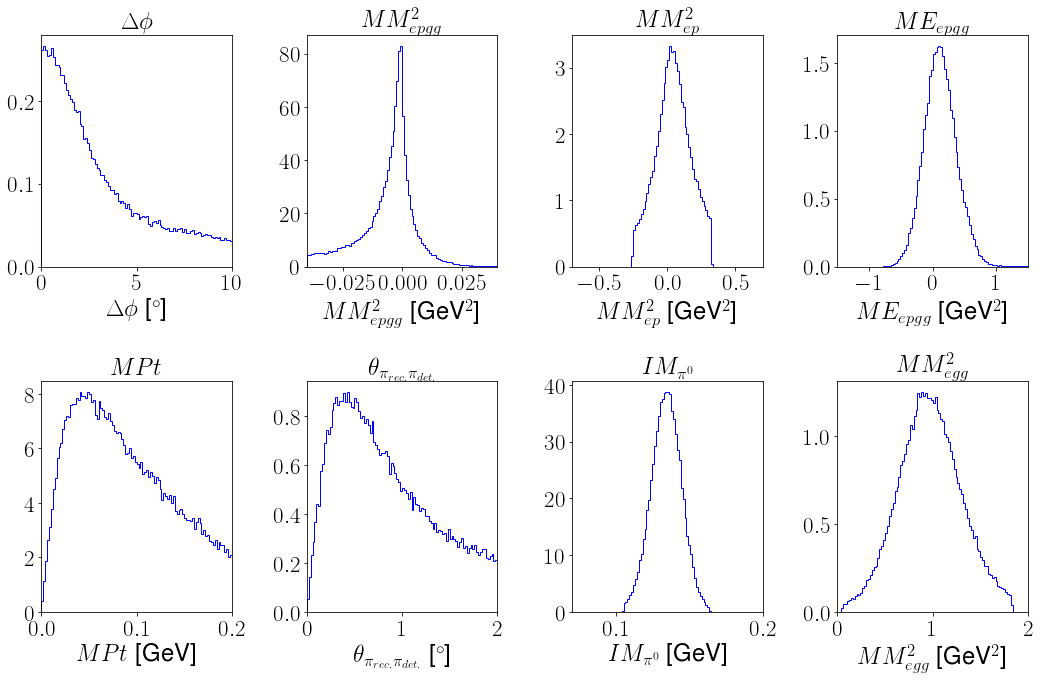

In [245]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [246]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbFD.ME_epgg, bins = np.linspace(-1, 1, 101))
    else:
        dist, bins = np.histogram(pi0SimOutbFD.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 95
0.8929679305518003 78.29079659757774 95
[0.08737099 0.22699347 0.05944057 0.18654345 0.20872983] -0.28600004739049123 0.4607420175872607 0.8929679305518003
0.8078163722727669 82.89163438972545 95
0.9341588612865142 75.12549606364144 95
[0.08554351 0.22296719 0.10467005 0.23991858 0.18408192] -0.2812048772323919 0.45229190613189085 0.9341588612865142
0.9627211395609389 71.92662502822988 95
[0.08554323 0.22297404 0.10688115 0.24261732 0.1666624 ] -0.2812164305990109 0.452302881660281 0.9627211395609389
0.9645297485604912 71.6676326896706 95
[0.08555526 0.22298947 0.10699836 0.24277287 0.16441351] -0.2812297753701004 0.45234029532498565 0.9645297485604912
0.9657885200074198 71.4813072961816 95
[0.08559318 0.22306388 0.10750009 0.24353782 0.15562238] -0.28131424662934 0.45250061033565586 0.9657885200074198
0.9483873038468211 73.69914800217117 95
0.9784420891870389 69.22503660523535 95
[0.0855641  0.22297362 0.10714765 0.24259892 0.16494036] -0.2811948654831882 0.4523230649313376

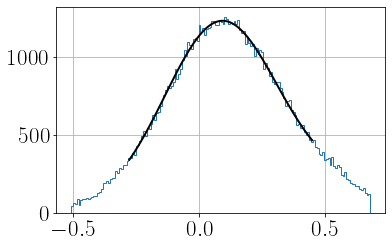

In [247]:
pi0SimOutbFD.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [249]:
print(ub_opt, lb_opt)

0.7544849554120137 -0.5833567559638642


In [250]:
pi0SimOutbFD = pi0SimOutbFD.loc[(pi0SimOutbFD.ME_epgg<0.754) & (pi0SimOutbFD.ME_epgg>-0.583)]

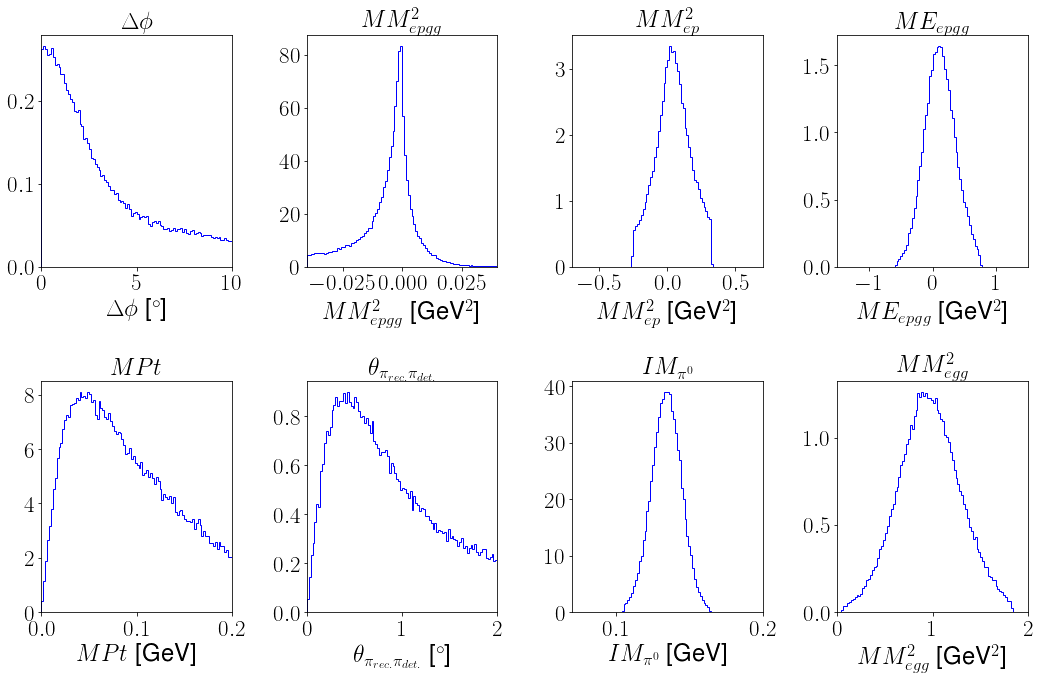

In [251]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [254]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbFD.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutbFD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.014
    ub = loc+3.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.7145911296668574 0.014 0.20577052854485786
[ 3.25530046e+00 -4.05355923e-04  5.89073956e-02 -7.04137242e+00
  1.70269948e+02 -6.63165525e+02] 0.014 0.20577052854485786 0.7145911296668574
0.32117678401504857 0.014 0.2420150947210667
0.020070092154543362 0.014 0.26833931625094964
5.4758916637753785e-06 0.014 0.2857588079241855
1.1343760819571003e-08 0.014 0.2963080372667985
4.227729277772596e-13 0.014 0.3053162466313781
0.0 0.014 0.31196344424200606
0.0 0.014 0.3173932476357189
0.0 0.014 0.32134575740606114
0.0 0.014 0.32463907321892377


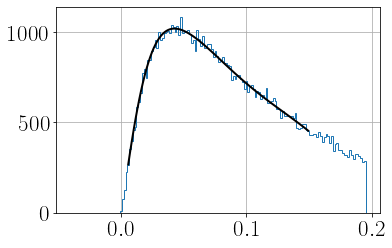

In [255]:
pi0SimOutbFD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [256]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.17699154184639349

In [257]:
pi0SimOutbFD = pi0SimOutbFD.loc[(pi0SimOutbFD.MPt<0.177)]

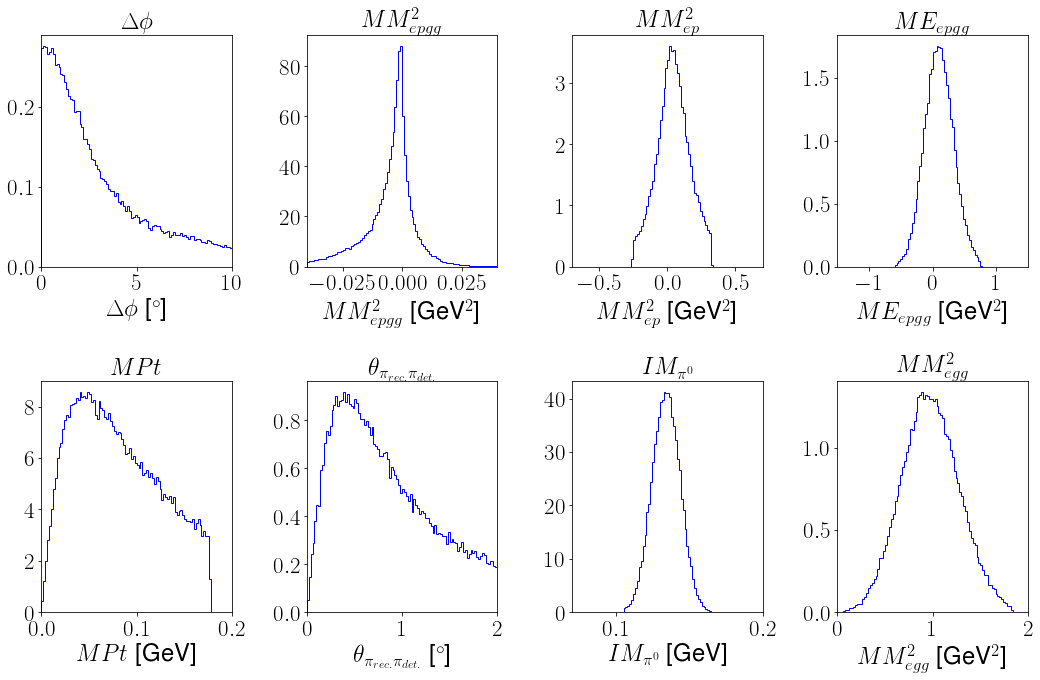

In [258]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [259]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbFD.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutbFD.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.001
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.44256632412334995 0.001 1.9378112104898095
[ 3.84904612  0.04542741  0.6307946  -0.46938296  0.84592794 -0.26088385] 0.001 1.9378112104898095 0.44256632412334995
0.5492410217392156 0.001 1.9328454802809465
[ 3.86959416  0.04750206  0.62844781 -0.46409641  0.84968648 -0.26367066] 0.001 1.9328454802809465 0.5492410217392156
0.10333275822515597 0.001 1.9359001831015454
0.31679372897270097 0.001 1.9327334090451531
0.12065447141826458 0.001 1.93637647071529
0.28399585500804203 0.001 1.9298272534044814
0.09271727983674438 0.001 1.932785711442872
0.10710250970901958 0.001 1.9357238466357294
0.29401377102150483 0.001 1.9332274550587172
0.08482869963365636 0.001 1.9363289357938722


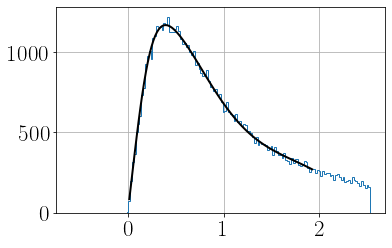

In [260]:
pi0SimOutbFD.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [261]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.9400435696756906

In [262]:
pi0SimOutbFD = pi0SimOutbFD.loc[(pi0SimOutbFD.reconPi<1.940)]

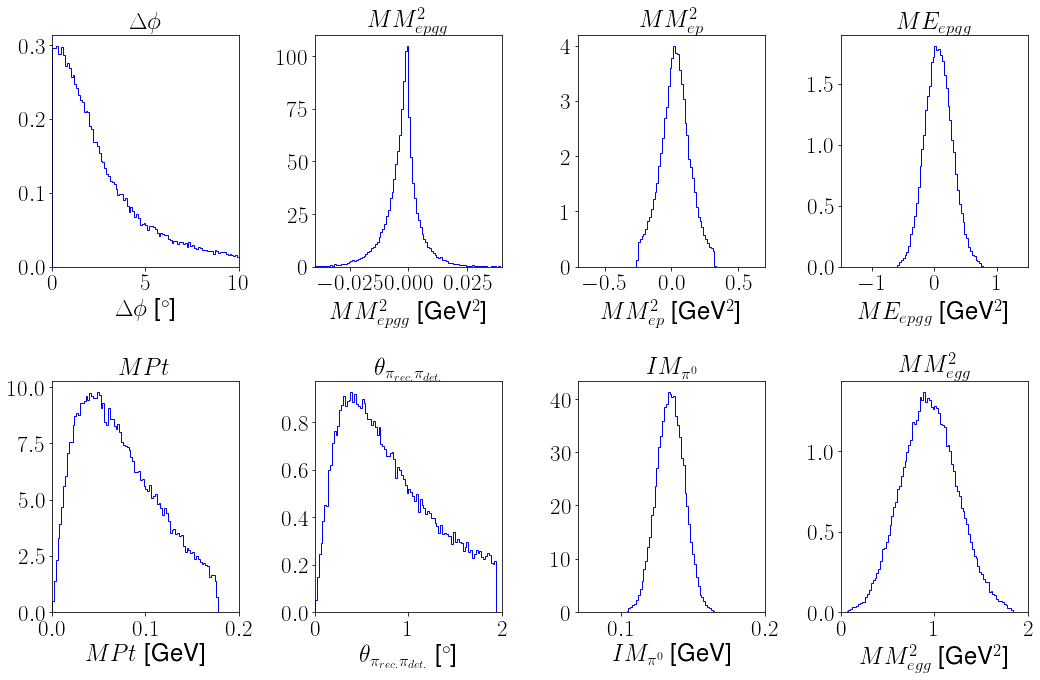

In [263]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbFD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [270]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbFD.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutbFD.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2.6*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = 3*params_opt[0]
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 5.5723356703384965 0.0
0 6.497938241968162 0.0127803880778945
[ 2.49920702  0.02496035 -0.02703464  0.00531273] 0 6.497938241968162 0.0127803880778945
0 7.716482294242905 2.220446049250313e-16
0 11.590139129996459 0.0
0 317.97272866025025 0.0
0 5882.51221463801 0.0
0 97061.45154751373 0.0


<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0 1601513.950533978 0.0
0 26424980.183810633 0.0
0 356737232.4814436 0.0


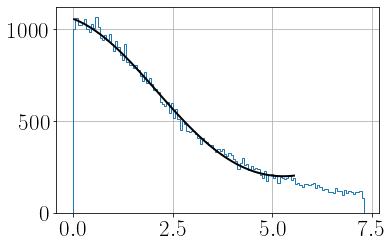

In [271]:
pi0SimOutbFD.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [272]:
ub_opt

7.4976210484248025

In [273]:
pi0SimOutbFD = pi0SimOutbFD.loc[pi0SimOutbFD.coplanarity < 7.498]

In [274]:
pi0SimOutbFD.MM2_epgg.mean()+3*pi0SimOutbFD.MM2_epgg.std()

0.0194784143947907

In [275]:
pi0SimOutbFD.MM2_epgg.mean()-3*pi0SimOutbFD.MM2_epgg.std()

-0.023953419755718644

In [276]:
pi0SimOutbFD = pi0SimOutbFD.loc[(pi0SimOutbFD.MM2_epgg>-0.0240) & (pi0SimOutbFD.MM2_epgg<0.0195)]

In [277]:
len(pi0SimOutbFD)

58478

In [278]:
pi0SimOutbCD = pi0SimOutb.loc[pi0SimOutb.config == 2]

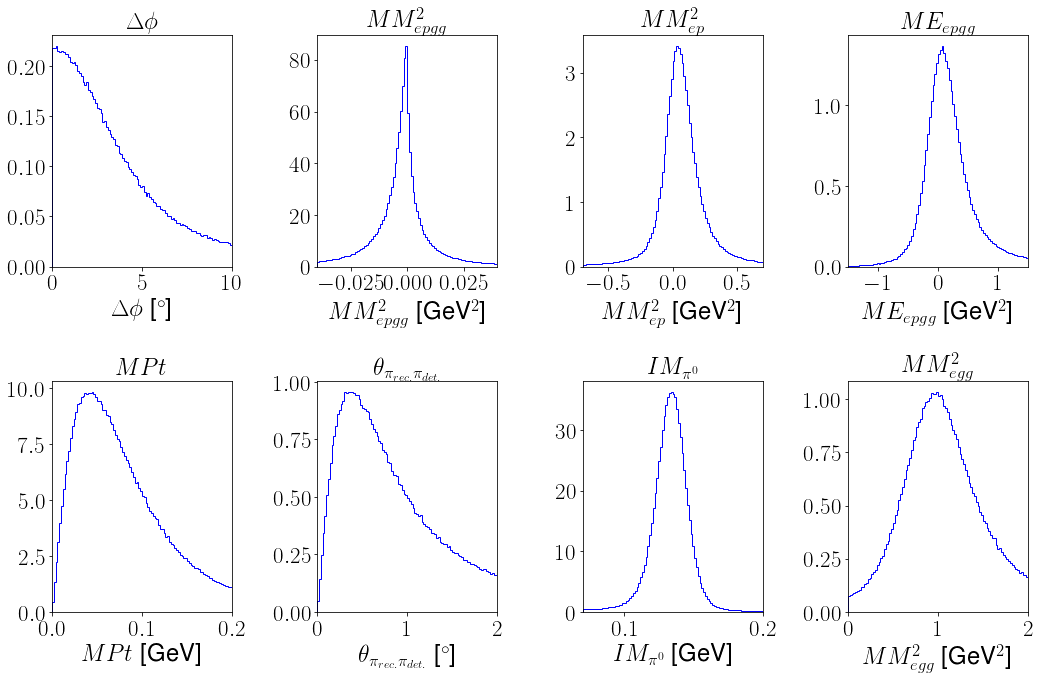

In [279]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbCD.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [281]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCD.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimOutbCD.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 35007.066384828235 95
0.7832018463562328 83.98938164663922 95
[ 1.34225413e-01  9.62957913e-03  9.58343964e+01 -1.34890829e+03
  4.80654098e+03] 0.11838616456611589 0.15006466088237713 0.7832018463562328
0.7396199326322357 85.79129192983697 95
0.7463972769686319 85.52078396687439 95
0.9025120565150482 77.644317577618 95
[ 1.34266075e-01  9.44040453e-03  7.85167558e+01 -1.05308931e+03
  3.64946773e+03] 0.1187379912799962 0.14979415855170447 0.9025120565150482
0.8242765629538338 82.1148456755317 95
0.9236113787839833 76.04441871452394 95
[ 1.34266988e-01  9.43994224e-03  7.79068997e+01 -1.04347484e+03
  3.61247277e+03] 0.11873966440080802 0.1497943108759376 0.9236113787839833
0.8475628243186113 80.9417185037573 95
0.9045930322091589 77.4977764525237 95
0.8605428310587624 80.24115313761314 95


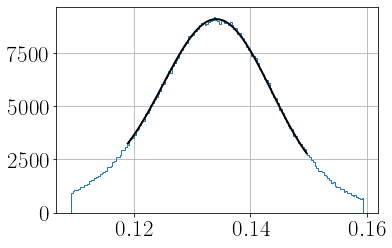

In [282]:
pi0SimOutbCD.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [283]:
print(ub_opt, lb_opt)

0.16258681436911243 0.10594716090763318


In [284]:
pi0SimOutbCD = pi0SimOutbCD.loc[(pi0SimOutbCD.Mpi0<0.163) & (pi0SimOutbCD.Mpi0>0.106)]

In [295]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCD.MM2_ep, bins = np.linspace(-0.5, 0.5, 101))
    else:
        dist, bins = np.histogram(pi0SimOutbCD.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.04, loc = loc, scale = scale)
    ub = norm.ppf(0.96, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 38189.7144725222 95
0.0 389.22016332841946 95
0.0002837312522732116 149.87484894742423 95
[ 0.03919351  0.08756377 -0.04884332  0.23043426 22.48487716] -0.11410315861319512 0.1924901745240131 0.0002837312522732116
0.0014956684231463013 141.15818660045431 95
[ 3.85557090e-02  8.60745421e-02 -2.18818788e-03  3.09268649e-01
  2.50189929e+01] -0.11213379287441483 0.18924521087797808 0.0014956684231463013
0.024884851084640225 123.89039890186864 95
[3.83703000e-02 8.55090935e-02 8.08758169e-03 2.84580504e-01
 2.64811865e+01] -0.11132927892390024 0.18806987893398913 0.024884851084640225
0.16518003002810955 108.33506161366718 95
[3.81925799e-02 8.53976686e-02 1.52390986e-02 3.59179413e-01
 2.64853500e+01] -0.11131192910639812 0.18769708886025896 0.16518003002810955
0.03652132406190023 121.12777298348837 95
0.03900371116711887 120.63948885668597 95
0.03564471890824461 121.30701473765997 95
0.048782630509121794 118.94222234877645 95


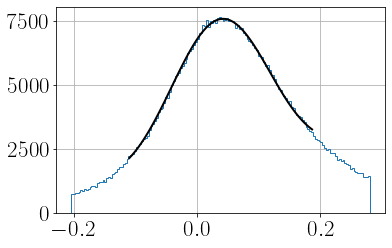

In [296]:
pi0SimOutbCD.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [297]:
print(ub_opt, lb_opt)

0.29438558575901214 -0.21800042600515127


In [298]:
pi0SimOutbCD = pi0SimOutbCD.loc[(pi0SimOutbCD.MM2_ep<0.294) & (pi0SimOutbCD.MM2_ep>-0.218)]

In [299]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCD.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimOutbCD.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 2180.1208252050656 95
0.04035847214231225 120.38411914022369 95
[ 0.94991702  0.32131253  0.15366173 -0.44716478  0.31739027] 0.4214049438534163 1.4784290919183318 0.04035847214231225
0.4703305347901723 95.35973245916657 95
[ 0.9461617   0.31154465  0.21829986 -0.54952755  0.3904538 ] 0.43371634987846175 1.4586070403892855 0.4703305347901723
0.5947264362805673 91.08157565086942 95
[ 0.94516678  0.3103202   0.20011288 -0.48709241  0.36328201] 0.4347354631737955 1.455598089144122 0.5947264362805673
0.32694295268828966 100.62387466290798 95
0.3039573526226932 101.55359394885306 95
0.34802351449633406 99.79917449564394 95
0.3098618089988876 101.31142278968603 95
0.379522115937695 98.60783096373535 95
0.35393897292333154 99.5719658619148 95


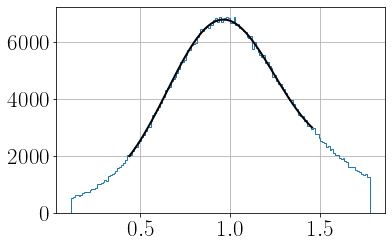

In [300]:
pi0SimOutbCD.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [302]:
print(ub_opt, lb_opt)

1.8761273880120322 0.014206164305885505


In [303]:
pi0SimOutbCD = pi0SimOutbCD.loc[(pi0SimOutbCD.MM2_egg<1.876) & (pi0SimOutbCD.MM2_egg>-0.0142)]

In [306]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCD.ME_epgg, bins = np.linspace(-1, 1, 101))
    else:
        dist, bins = np.histogram(pi0SimOutbCD.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 95
0.12993684320445498 110.65802278251371 95
[0.05366328 0.22412562 0.02035534 0.2490072  0.70172903] -0.3149905633603408 0.42231712031281815 0.12993684320445498
0.09970871013232963 113.0633990560433 95
0.09433097608395502 113.54902538918891 95
0.06606914300602984 116.5415617634493 95
0.13541105100998863 110.26908959244359 95
[0.05124048 0.21624055 0.08551922 0.30726988 0.8785067 ] -0.3044435702878867 0.4069245224657848 0.13541105100998863
0.12674274601275992 110.89064682217976 95
0.12490250792054036 111.02667612231507 95
0.12859912142029362 110.75492053182018 95
0.11885769736533436 111.48443565261938 95


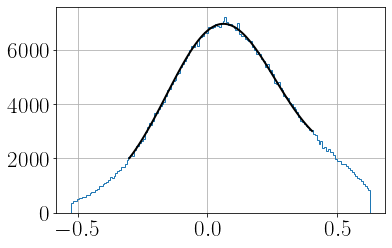

In [307]:
pi0SimOutbCD.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [308]:
print(ub_opt, lb_opt)

0.6999621140794086 -0.5974811619015103


In [309]:
pi0SimOutbCD = pi0SimOutbCD.loc[(pi0SimOutbCD.ME_epgg<0.700) & (pi0SimOutbCD.ME_epgg>-0.597)]

In [314]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCD.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutbCD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = loc*0.6
    ub = loc+2.7*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


3.1984581119193223e-06 0.005663857866403633 0.16231394545097783
[ 3.63237428e+00  9.43976311e-03  5.66200675e-02 -2.81497543e+00
  8.00335104e+01 -3.73715365e+02] 0.005663857866403633 0.16231394545097783 3.1984581119193223e-06
1.9087288605224018e-07 0.006311315764967393 0.16841639954631915
1.5602117288127104e-06 0.006758364193204298 0.17254835473871966
2.5001152459735998e-05 0.00694969144743524 0.17451771912155004
[ 4.08307702e+00  1.15828191e-02  6.03462593e-02 -1.15742446e+00
  3.29944369e+01 -1.41460488e+02] 0.00694969144743524 0.17451771912155004 2.5001152459735998e-05
0.0018543677585585172 0.007024112325979517 0.17528485703009683
[ 4.09844742e+00  1.17068539e-02  6.05844456e-02 -1.04718367e+00
  3.02615591e+01 -1.29036552e+02] 0.007024112325979517 0.17528485703009683 0.0018543677585585172
0.000457788058352393 0.007053763693907387 0.17559523782609748
0.00042479947236617743 0.007084252858748024 0.1758898354196342
0.0001212141031645686 0.007104250353317836 0.17609799613949614
7.76334

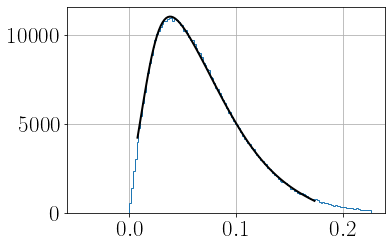

In [315]:
pi0SimOutbCD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [316]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.19415411032270183

In [317]:
pi0SimOutbCD = pi0SimOutbCD.loc[(pi0SimOutbCD.MPt<0.194)]

In [322]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCD.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutbCD.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = loc*0.8
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = loc+3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


3.051892072392093e-12 0.05283117865470947 1.8211773746880893
[ 4.21657808  0.06603897  0.58504613 -0.39510537  0.7456186  -0.24839196] 0.05283117865470947 1.8211773746880893 3.051892072392093e-12
0.2807178742976717 0.05100035745069597 1.7709364115529547
[ 3.86317301  0.06375045  0.56906199 -0.40228739  0.83509033 -0.29660175] 0.05100035745069597 1.7709364115529547 0.2807178742976717
0.46685137407135446 0.05144626321026394 1.7655525924730915
[ 3.86251586  0.06430783  0.56708159 -0.40114816  0.84571441 -0.30300296] 0.05144626321026394 1.7655525924730915 0.46685137407135446
0.23313748558848446 0.051058302107915426 1.7606260724508918
0.2756599049509806 0.050893893719585484 1.7580196219422257
0.30063832047187145 0.050661069659693095 1.7552717173844379
0.4894693710291267 0.05066221847321524 1.754965714209265
[ 3.81143903  0.06332777  0.56387931 -0.40955426  0.87360228 -0.31669131] 0.05066221847321524 1.754965714209265 0.4894693710291267
0.3967418019897154 0.05064342666268247 1.75477032360101

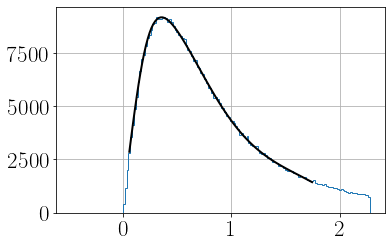

In [323]:
pi0SimOutbCD.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [324]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.7614242516914698

In [325]:
pi0SimOutbCD = pi0SimOutbCD.loc[(pi0SimOutbCD.reconPi<1.761)]

In [326]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCD.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutbCD.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = 3*params_opt[0]
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 7.859463602526113 0.0
0 6.891849945461067 0.0
0 6.552494291356737 3.6943867293803834e-05
[ 3.27624715e+00  1.59331648e-02 -9.36559283e-03  1.35661791e-03] 0 6.552494291356737 3.6943867293803834e-05
0 6.43023335162293 0.0004543133770424923
[ 3.21511668e+00  1.45551450e-02 -8.26169681e-03  1.31729904e-03] 0 6.43023335162293 0.0004543133770424923
0 6.3840206058364295 0.00141275673605179
[ 3.19201030e+00  1.40794998e-02 -7.84792388e-03  1.30517498e-03] 0 6.3840206058364295 0.00141275673605179
0 6.364043103370074 0.007885545816152972
[ 3.18202155e+00  1.38127335e-02 -7.66676913e-03  1.30150340e-03] 0 6.364043103370074 0.007885545816152972
0 6.352548208596734 0.02789765485967377
[ 3.17627410e+00  1.35583487e-02 -7.53577460e-03  1.29692379e-03] 0 6.352548208596734 0.02789765485967377
0 6.353135367062376 0.04766694751942124
[ 3.17656768e+00  1.37526381e-02 -7.56039140e-03  1.29551435e-03] 0 6.353135367062376 0.04766694751942124
0 6.353550383987906 0.06853662260179028
[ 3.17677519e+00  1.3761

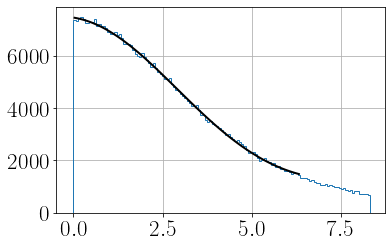

In [328]:
pi0SimOutbCD.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [329]:
ub_opt

9.530325575981859

In [330]:
pi0SimOutbCD = pi0SimOutbCD.loc[pi0SimOutbCD.coplanarity < 9.530]

In [331]:
pi0SimOutbCD.MM2_epgg.mean()+3*pi0SimOutbCD.MM2_epgg.std()

0.01820123505318155

In [332]:
pi0SimOutbCD.MM2_epgg.mean()-3*pi0SimOutbCD.MM2_epgg.std()


-0.021854173171501273

In [333]:
pi0SimOutbCD = pi0SimOutbCD.loc[(pi0SimOutbCD.MM2_epgg>-0.0219) & (pi0SimOutbCD.MM2_epgg<0.0182)]

In [334]:
len(pi0SimOutbCD)

475425

In [335]:
pi0SimOutbCDFT = pi0SimOutb.loc[pi0SimOutb.config == 3]

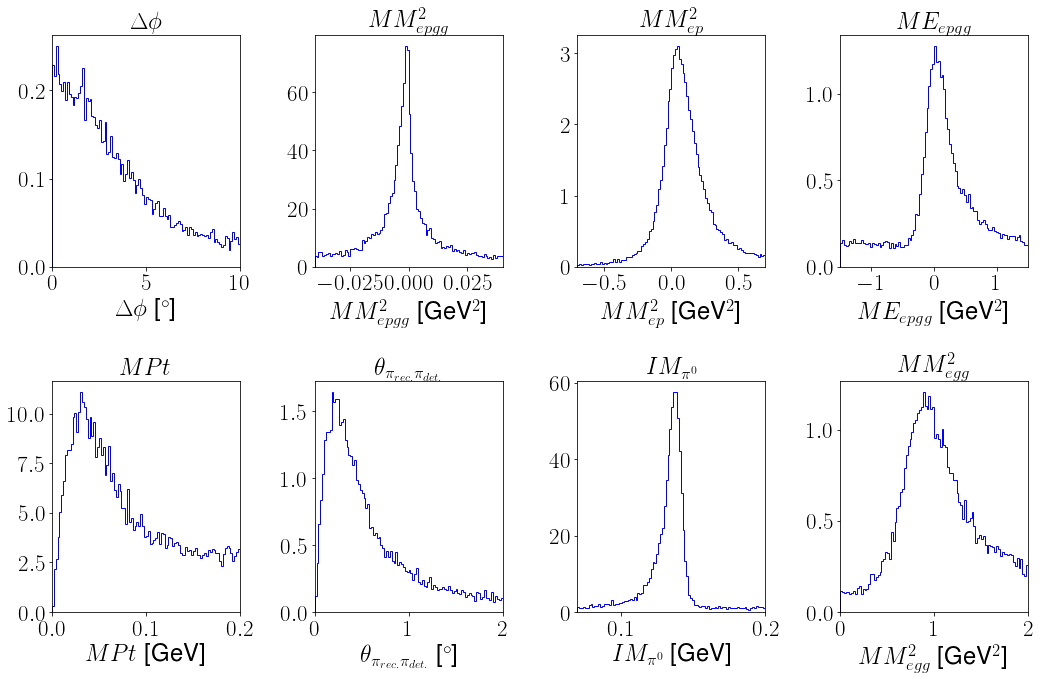

In [336]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [337]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCDFT.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimOutbCDFT.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.97, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 6128.466870523304 95
1.5820323672199876e-06 173.52031942505846 95
[ 1.37205482e-01  5.12695259e-03  1.26096049e+03 -1.77111447e+04
  6.18612440e+04] 0.12667600848859606 0.1468482214284332 1.5820323672199876e-06
0.4283392051501722 96.83520365800878 95
[ 1.37426395e-01  4.63713287e-03  2.63514017e+03 -3.73147729e+04
  1.31800983e+05] 0.12790288891759322 0.1461478853575802 0.4283392051501722
0.6762509602215132 88.19589627254531 95
[ 1.37520953e-01  4.58887988e-03  2.20196020e+03 -3.07156225e+04
  1.06867055e+05] 0.12809654643094115 0.14615168942041543 0.6762509602215132
0.6565799919615851 88.90770444019418 95
0.8429901116990425 81.17994272607612 95
[ 1.37528900e-01  4.56444617e-03  2.31162917e+03 -3.22857362e+04
  1.12496856e+05] 0.12815467327355007 0.14611368080345977 0.8429901116990425
0.7178348978401512 86.64112801931647 95
0.6273947101937645 89.94333243068608 95
0.6744662672631618 88.26101629211975 95
0.6350894224668846 89.67231317171348 95


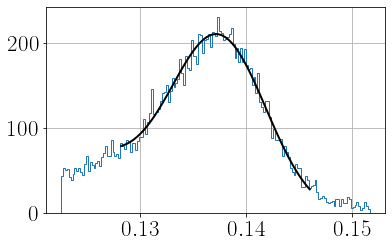

In [338]:
pi0SimOutbCDFT.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [339]:
print(ub_opt, lb_opt)

0.16035113047165653 0.11470666877331329


In [340]:
pi0SimOutbCDFT = pi0SimOutbCDFT.loc[(pi0SimOutbCDFT.Mpi0<0.160) & (pi0SimOutbCDFT.Mpi0>0.115)]

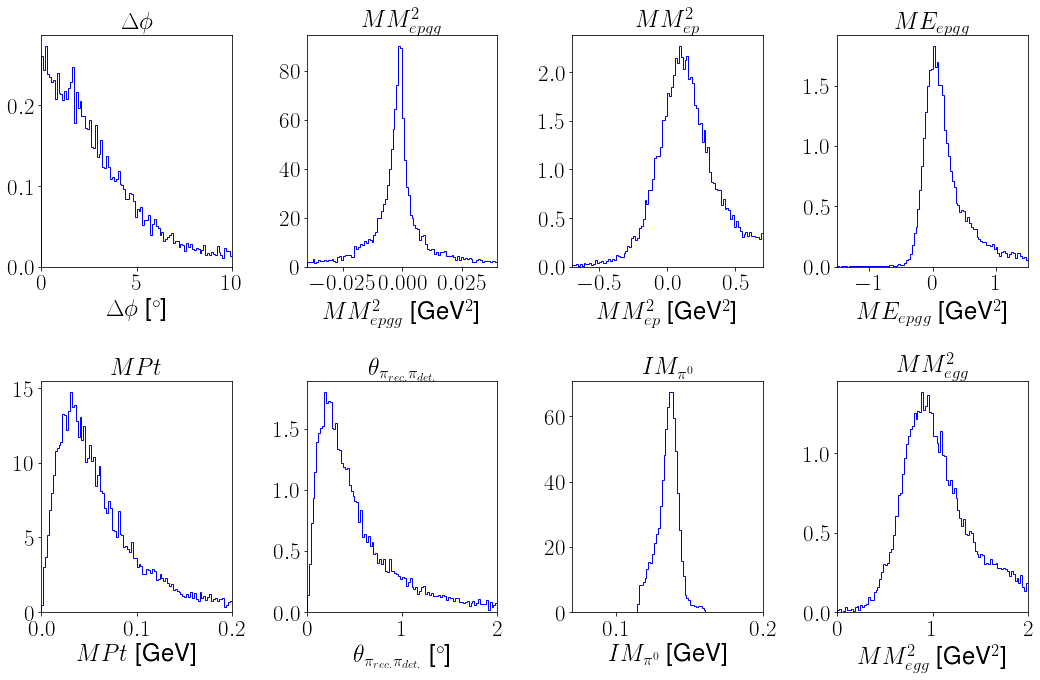

In [341]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()


In [343]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCDFT.MM2_ep, bins = np.linspace(-0.5, 0.5, 101))
    else:
        dist, bins = np.histogram(pi0SimOutbCDFT.MM2_ep, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

2.9922619937394757e-11 214.70580498838393 95
[ 0.09792047  0.17127225 -0.1147416   0.21711411  1.49319581] -0.2538297329967555 0.4496706633432343 2.9922619937394757e-11
0.8244150004079931 82.10814463138242 95
[ 0.09899119  0.15851808 -0.11213904 -0.09957921  3.13864394] -0.22656513442433523 0.42454752389675704 0.8244150004079931
0.37568352057856913 98.75071634642798 95
0.6944888070401569 87.52342395710735 95
0.3174371619714984 101.00419350987082 95
0.3604986094447482 99.32198875470287 95
0.3629924085144567 99.2274773998347 95
0.3824162442240009 98.50048511812265 95
0.4171641141456994 97.23456209754755 95
0.30127315950689837 101.66450413343911 95


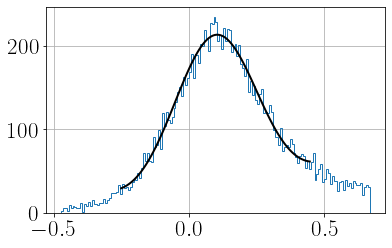

In [344]:
pi0SimOutbCDFT.MM2_ep.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [345]:
print(ub_opt, lb_opt)

0.8915815826731444 -0.6935991932007224


In [346]:
pi0SimOutbCDFT = pi0SimOutbCDFT.loc[(pi0SimOutbCDFT.MM2_ep<0.892) & (pi0SimOutbCDFT.MM2_ep>-0.694)]

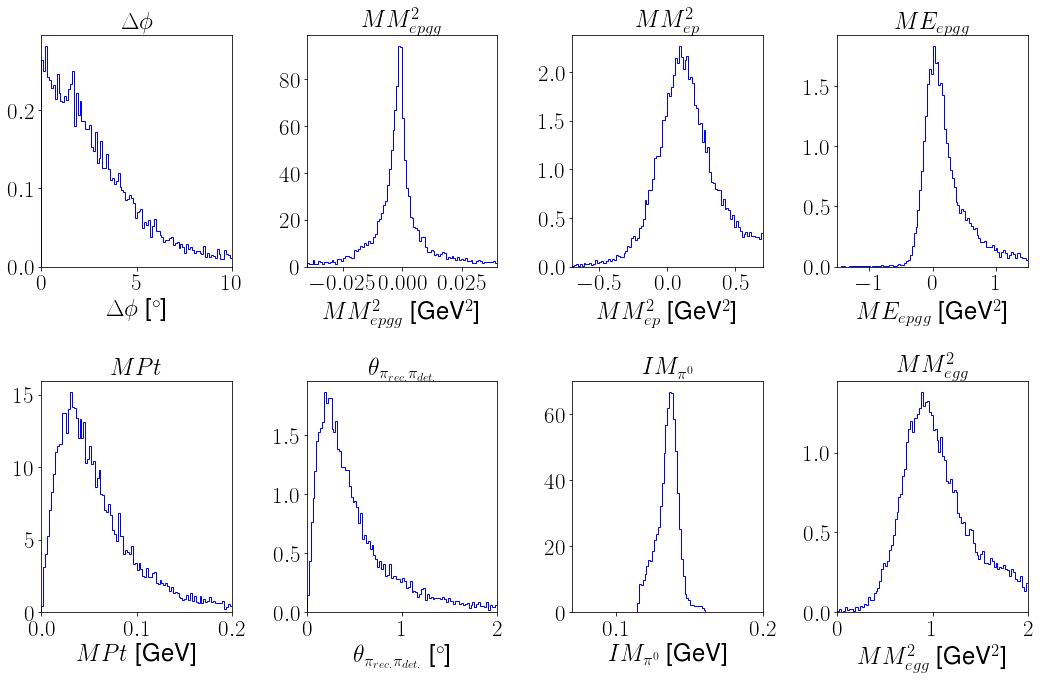

In [347]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [348]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCDFT.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimOutbCDFT.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 95
0.035959357876479636 121.24224853407637 95
[ 0.88857342  0.27074151 -0.46469226  0.4656553   0.0249828 ] 0.4432432596863475 1.5184123672829863 0.035959357876479636
0.04048452375018863 120.36073234313292 95
[ 0.89163298  0.26006124 -0.2551908   0.03222872  0.25545603] 0.46387030932490614 1.4966258917214712 0.04048452375018863
0.3428593611862073 99.9989721112701 95
[ 0.88629034  0.25962288 -0.41765537  0.36763313  0.1110303 ] 0.4592486979113726 1.4902634867249773 0.3428593611862073
0.011635802818896535 129.0019969680093 95
0.06346631812701264 116.86686940619009 95
0.04214259060146819 120.05874152032406 95
0.04430758655580025 119.6792743764186 95
0.04087236316115217 120.28916240506098 95
0.07219613239298572 115.81534850836505 95


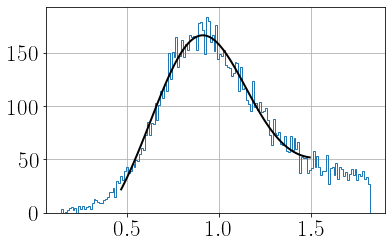

In [349]:
pi0SimOutbCDFT.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [350]:
print(ub_opt, lb_opt)

2.184404763947506 -0.41182408154416017


In [351]:
pi0SimOutbCDFT = pi0SimOutbCDFT.loc[(pi0SimOutbCDFT.MM2_egg<2.184) & (pi0SimOutbCDFT.MM2_egg>-0.412)]

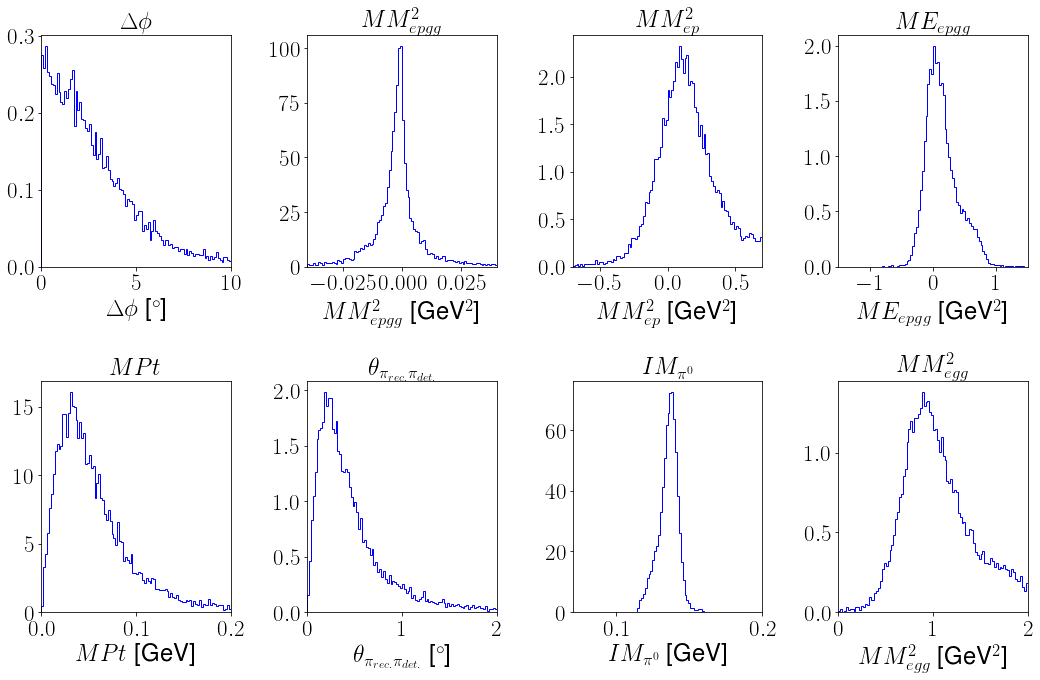

In [352]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [353]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCDFT.ME_epgg, bins = np.linspace(-0.6, 0.6, 101))
    else:
        dist, bins = np.histogram(pi0SimOutbCDFT.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.02, loc = loc, scale = scale)
    ub = norm.ppf(0.98, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 95
0.5506391640463328 92.59775504978329 95
[ 0.02316236  0.17076821 -0.08938335  0.75724141  1.98969369] -0.32755266798059995 0.37387737846782654 0.5506391640463328
0.7400267868490176 85.77514061612241 95
[ 0.02003304  0.16677264 -0.0694276   0.89454982  2.39094506] -0.32247608646905046 0.3625421736815818 0.7400267868490176
0.6831592648474378 87.94271589678829 95
0.8579441443364574 80.38448846033344 95
[ 0.01967378  0.16602856 -0.05294714  0.92867161  2.35558284] -0.32130718226486465 0.36065475162413874 0.8579441443364574
0.8979524308382838 77.95819855195327 95
[ 0.01945836  0.16560524 -0.05698258  0.93397043  2.46557276] -0.3206532185326725 0.35956994542579324 0.8979524308382838
0.9114236699326602 77.00094274163547 95
[ 0.01902245  0.16506284 -0.06234341  0.94758632  2.61306727] -0.3199751733644448 0.35802008071416697 0.9114236699326602
0.7335379522325525 86.03145164972352 95
0.7424950632352175 85.67691770912677 95
0.7022130432376067 87.23440068327993 95


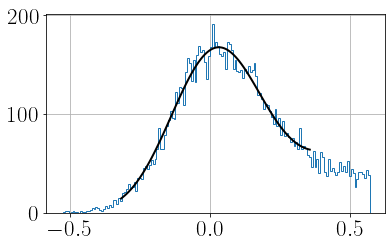

In [354]:
pi0SimOutbCDFT.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [355]:
print(ub_opt, lb_opt)

0.8443366517357512 -0.806291744386029


In [356]:
pi0SimOutbCDFT = pi0SimOutbCDFT.loc[(pi0SimOutbCDFT.ME_epgg<0.844) & (pi0SimOutbCDFT.ME_epgg>-0.806)]

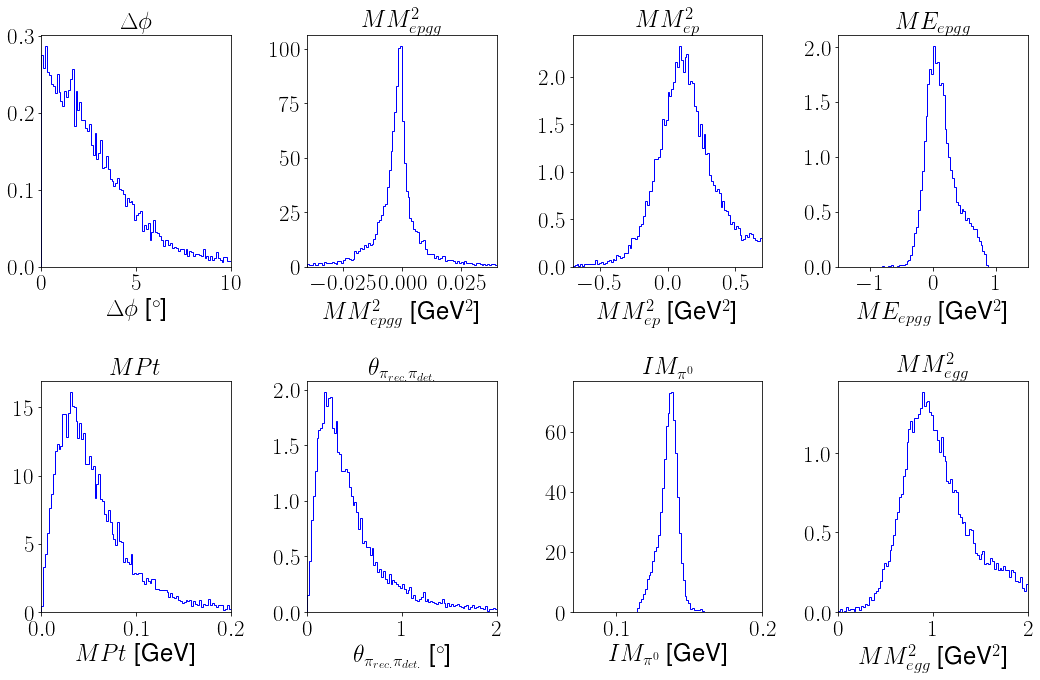

In [357]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [358]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCDFT.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutbCDFT.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.5937569507200444 0.002 0.12901536556762094
[ 2.98893870e+00  8.13755437e-03  4.02926037e-02 -3.59076325e+00
  1.02470949e+02 -4.94140583e+02] 0.002 0.12901536556762094 0.5937569507200444
0.2262171756915805 0.002 0.1268733306437116
0.23705393939851893 0.002 0.1272025343224215
0.1264985253164418 0.002 0.12636158972171382
0.2174543063768305 0.002 0.12635041608165526
0.18861960308555958 0.002 0.12635773417371768
0.2098249841398594 0.002 0.12637308986234916
0.21934114024374973 0.002 0.1263510013427444
0.19222757993080686 0.002 0.12637361578545783
0.22020676882846757 0.002 0.12636960128787944


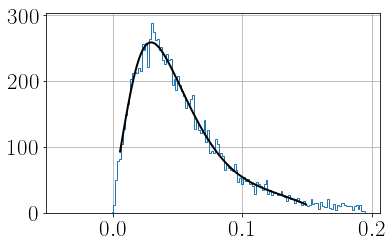

In [359]:
pi0SimOutbCDFT.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [360]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.20960057302641294

In [361]:
pi0SimOutbCDFT = pi0SimOutbCDFT.loc[(pi0SimOutbCDFT.MPt<0.210)]

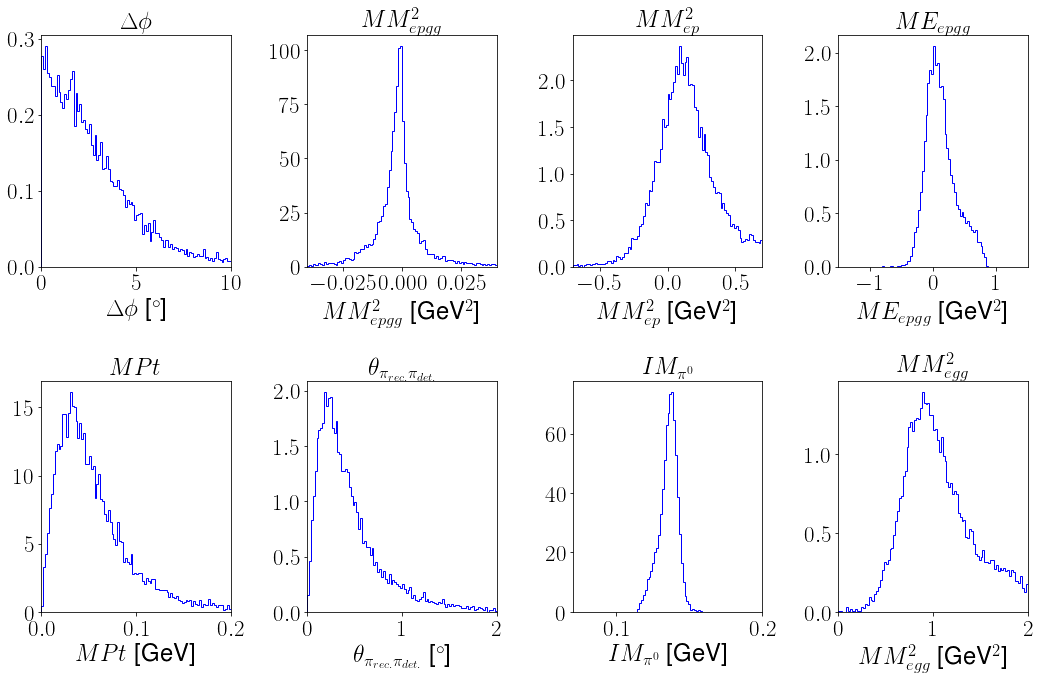

In [362]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [363]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCDFT.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutbCDFT.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 0.002 1.1289318380476996
0.6921773772967972 0.002 0.9979988440279781
[ 4.09239332  0.05063095  0.3157893  -0.53628981  1.75978537 -1.01441985] 0.002 0.9979988440279781 0.6921773772967972
0.23633404762234023 0.002 0.9776140319990251
0.24042662663823322 0.002 0.9752227107407397
0.4691879184165416 0.002 0.9714688609128607
0.509722728216782 0.002 0.9641523263777009
0.4485344593848447 0.002 0.9666101787294923
0.4068615521174229 0.002 0.9714465804589671
0.4934569027705684 0.002 0.9639776597409755
0.5740235669991682 0.002 0.9666461736541655


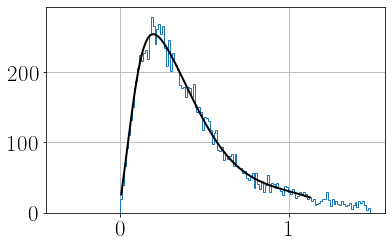

In [364]:
pi0SimOutbCDFT.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [365]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.629577439065444

In [366]:
pi0SimOutbCDFT = pi0SimOutbCDFT.loc[(pi0SimOutbCDFT.reconPi<1.630)]

In [367]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutbCDFT.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutbCDFT.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 8.771152079589081 2.3281371031025344e-07
[ 3.50846083e+00  3.40867509e-02 -1.62277947e-02  1.42470367e-03] 0 8.771152079589081 2.3281371031025344e-07
0 8.908463446095444 0.204368228033445
[ 3.56338538e+00  4.55313990e-02 -2.13895695e-02  1.94400259e-03] 0 8.908463446095444 0.204368228033445
0 8.97447405542396 0.041268339793473
0 8.955356391417537 0.0020183150673002137
0 8.958927067574896 0.018603285766570887
0 8.951309429837574 0.011200781250944702
0 8.963715318626774 0.02573628173202669
0 8.952414421717762 0.0014037846152797906
0 8.960758190345292 0.011913146565402766
0 8.94400228339061 0.01958750465800363


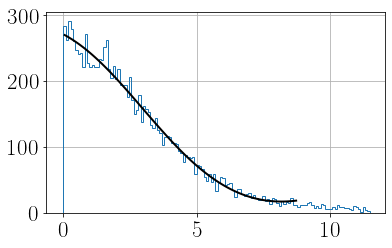

In [370]:
pi0SimOutbCDFT.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [371]:
print(ub_opt)

17.81692689219089


In [372]:
pi0SimOutbCDFT = pi0SimOutbCDFT.loc[pi0SimOutbCDFT.coplanarity<17.817]

In [373]:
pi0SimOutbCDFT.MM2_epgg.mean()+5*pi0SimOutbCDFT.MM2_epgg.std()

0.054892887649068314

In [374]:
pi0SimOutbCDFT.MM2_epgg.mean()-5*pi0SimOutbCDFT.MM2_epgg.std()

-0.05754072164726133

In [187]:
pi0SimOutbCDFT = pi0SimOutbCDFT.loc[(pi0SimOutbCDFT.MM2_epgg>-0.0575) & (pi0SimOutbCDFT.MM2_epgg<0.0549)]

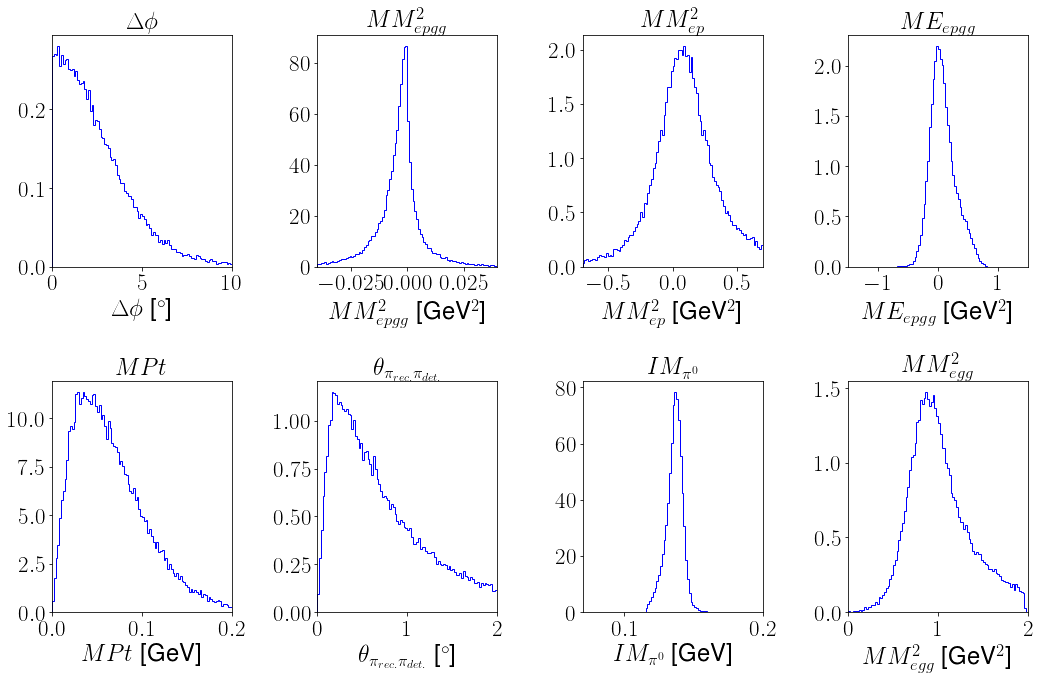

In [188]:
varstoplot = ["coplanarity", "MM2_epgg", "MM2_ep", "ME_epgg", "MPt", "reconPi", "Mpi0", "MM2_egg"]
title = [r"$\Delta\phi$", r"$MM^2_{epgg}$", r"$MM^{2}_{ep}$", r"$ME_{epgg}$", r"$MPt$", r"$\theta_{\pi_{rec.}\pi_{det.}}$", r"$IM_{\pi^0}$", r"$MM^2_{egg}$" ]
unit = [degree, GeV2, GeV2, GeV2, GeV, degree, GeV, GeV2, GeV, "cm"]
binstarts = [0, -0.04, -0.7, -1.5, 0, 0, 0.07, 0]
binends = [10, 0.04, 0.7, 1.5, 0.2, 2, 0.2, 2]
fig, axs = plt.subplots(2, 4, figsize = (15, 10))
for xind in range(0,4):
    for yind in range(0, 2):
        ind =xind+4*yind
        start = binstarts[ind]
        end = binends[ind]
        bins = np.linspace(start, end, 101)
        axs[yind, xind].hist(pi0SimOutbCDFT.loc[:, varstoplot[ind]], bins = bins, histtype='stepfilled', facecolor='none', edgecolor='b', density=True, linewidth=1)
        axs[yind, xind].set_title(title[ind])
        axs[yind, xind].set_xlim([start, end])
        if (unit[ind]):
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
        else:
            axs[yind, xind].set_xlabel(title[ind])
plt.show()

In [189]:
len(pi0SimOutbCDFT)

48193

## DVCS overlaps

In [102]:
# parent_epgg = "/Volumes/Extreme SSD/nov2021/convPkl_updatedPp/outb/epgg/"
parent_epgg = "/Volumes/Extreme SSD/nov2021/convPkl_FDrevisited/outb/epgg/"
epgg_4243 = pd.read_pickle(parent_epgg + "4243" + "_dvcs.pkl")
epgg_4240 = pd.read_pickle(parent_epgg + "4240" + "_dvcs.pkl")

In [103]:
pi0SimOutb_forDVCS = copy(epgg_4243)

In [104]:
pi0SimOutb_forDVCS_FD = pi0SimOutb_forDVCS.loc[pi0SimOutb_forDVCS.config == 1, :]

In [105]:
# pi0SimOutb_forDVCS_FD = pi0SimOutb_forDVCS_FD.loc[pi0SimOutb_forDVCS_FD.GFidFX == 1 , :]

In [106]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_FD.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_FD.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 1594.0500800910409 95
0.6096499129020165 90.56379734361516 95
[ 1.35967646e-01  1.12215582e-02  1.63434437e+02 -2.42559734e+03
  8.97614639e+03] 0.11750982559162818 0.15442546700221518 0.6096499129020165
0.17194810053592124 107.93088275273087 95
0.6595078384163848 88.80254516470512 95
[ 1.35920602e-01  1.01081460e-02  4.01323680e+02 -5.91989742e+03
  2.18594530e+04] 0.11929418149660456 0.15254702280918014 0.6595078384163848
0.9377007649373689 74.79327538398888 95
[ 1.35978707e-01  1.00782375e-02  3.89628988e+02 -5.72715570e+03
  2.11017309e+04] 0.11940148116861878 0.15255593206906146 0.9377007649373689
0.9212254474094036 76.23964491080434 95
0.9139964860476955 76.80700495358907 95
0.6902693728156486 87.68019939308448 95
0.927279439585268 75.73571918434384 95
0.7662133748060336 84.71047956066081 95


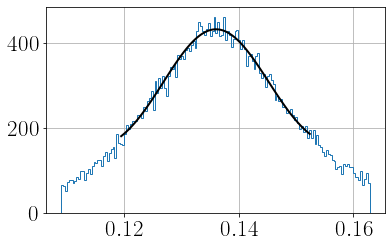

In [107]:
pi0SimOutb_forDVCS_FD.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [108]:
print(ub_opt, lb_opt)

0.16621341901865128 0.10574399421902898


In [109]:
pi0SimOutb_forDVCS_FD = pi0SimOutb_forDVCS_FD.loc[(pi0SimOutb_forDVCS_FD.Mpi0<0.166) & (pi0SimOutb_forDVCS_FD.Mpi0>0.106)]

In [110]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_FD.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_FD.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

1.4233145217978915e-08 192.30372382305828 95
[ 0.86054364  0.37611114  0.00527638 -0.0671154   0.05098698] 0.24189587050568673 1.4791914085065185 1.4233145217978915e-08
0.8491539226055851 80.85783077092134 95
[ 0.84854248  0.3464949   0.05749171 -0.10126036  0.10337062] 0.27860907439672733 1.4184758767264767 0.8491539226055851
0.2824322689028953 102.45848636395056 95
0.4041869766831705 97.7027421074273 95
0.5102312847332316 93.98251378606162 95
0.7534496317869408 85.235858035601 95
0.7268049623244109 86.29462478790833 95
0.7903703558630362 83.67668031367619 95
0.5791321957671595 91.61963703110419 95
0.540061423217475 92.9600711271237 95


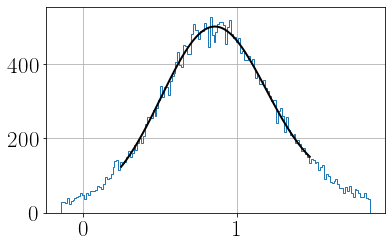

In [111]:
pi0SimOutb_forDVCS_FD.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [113]:
print(ub_opt, lb_opt)

1.8880271904802917 -0.19094223935708754


In [114]:
pi0SimOutb_forDVCS_FD = pi0SimOutb_forDVCS_FD.loc[(pi0SimOutb_forDVCS_FD.MM2_egg<1.888) & (pi0SimOutb_forDVCS_FD.MM2_egg>-0.191)]

In [115]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_FD.ME_epgg, bins = np.linspace(-1, 1, 101))
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_FD.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 95
0.7801802520795188 84.11962134052023 95
[ 0.03196278  0.27749495  0.07427296  0.14024968 -0.00367877] -0.4244757961540581 0.4884013527365568 0.7801802520795188
0.5781162476612972 91.65460627546274 95
0.7285728810130163 86.2257866676568 95
0.6754765617023355 88.2241666765723 95
0.6619225791005771 88.71561828111507 95
0.6878613618698122 87.7693358394958 95
0.31015366414141954 101.2995150484754 95
0.20519512635831116 106.09077018418829 95
0.3095525211393655 101.32404813999062 95


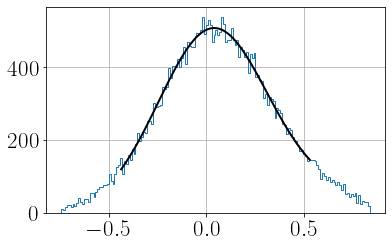

In [116]:
pi0SimOutb_forDVCS_FD.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [117]:
print(ub_opt, lb_opt)

0.8644476273375291 -0.8005220707550303


In [118]:
pi0SimOutb_forDVCS_FD = pi0SimOutb_forDVCS_FD.loc[(pi0SimOutb_forDVCS_FD.ME_epgg<0.864) & (pi0SimOutb_forDVCS_FD.ME_epgg>-0.801)]

In [120]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_FD.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_FD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.01811793589262045 0.002 0.1792220043434327
[ 3.13772239e+00 -2.00421421e-04  5.98074753e-02 -6.81277292e+00
  1.57526516e+02 -5.63370248e+02] 0.002 0.1792220043434327 0.01811793589262045
0.06269706712748335 0.002 0.19688599639739285
[ 3.56823919e+00 -2.93639756e-05  6.56384535e-02 -6.11340580e+00
  1.18285119e+02 -3.69957021e+02] 0.002 0.19688599639739285 0.06269706712748335
0.08597156932528516 0.002 0.19483731669536247
[ 3.40531107e+00 -1.54545421e-03  6.54609236e-02 -6.55248365e+00
  1.22698918e+02 -3.86965155e+02] 0.002 0.19483731669536247 0.08597156932528516
0.20211934924816743 0.002 0.19401882990843133
[ 3.37639317e+00 -1.55817734e-03  6.51923357e-02 -6.57542664e+00
  1.24203694e+02 -3.94130680e+02] 0.002 0.19401882990843133 0.20211934924816743
0.25337484747827144 0.002 0.1938972107870177
[ 3.36830930e+00 -1.49125977e-03  6.51294902e-02 -6.56164348e+00
  1.24151998e+02 -3.93979489e+02] 0.002 0.1938972107870177 0.25337484747827144
0.1304846478065882 0.002 0.19413922944541828
0.25

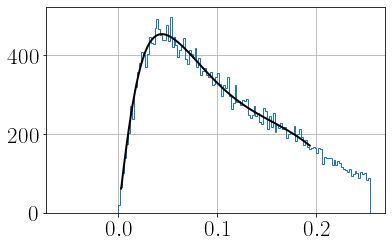

In [121]:
pi0SimOutb_forDVCS_FD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [122]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.19511500189077588

In [123]:
pi0SimOutb_forDVCS_FD = pi0SimOutb_forDVCS_FD.loc[(pi0SimOutb_forDVCS_FD.MPt<0.195)]

In [124]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_FD.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_FD.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.4098311354833468 0.002 1.5288633319475349
[ 3.77007719  0.0403655   0.49616595 -0.59765788  1.12636985 -0.37622971] 0.002 1.5288633319475349 0.4098311354833468
0.27185107606299186 0.002 1.3954347725768617
0.5595128133961673 0.002 1.2948037140688573
[ 2.71271225  0.03660667  0.41939901 -0.7580832   2.03218377 -0.92590208] 0.002 1.2948037140688573 0.5595128133961673
0.10438339170328204 0.002 1.2773995098093043
0.4509123973453776 0.002 1.2901934003739697
0.8001938196596445 0.002 1.281295639117269
[ 2.69436753  0.03985299  0.41381422 -0.74593491  2.09173666 -0.97408499] 0.002 1.281295639117269 0.8001938196596445
0.8338515445975795 0.002 1.294215147748803
[ 2.76341804  0.04266748  0.41718255 -0.71937643  1.99361565 -0.90905262] 0.002 1.294215147748803 0.8338515445975795
0.14872295098830723 0.002 1.2825955274677738
0.8184970022182391 0.002 1.2942435701852357
0.16473667376047618 0.002 1.2832274050191828


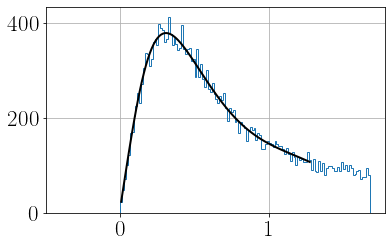

In [125]:
pi0SimOutb_forDVCS_FD.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [126]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.298993455980012

In [50]:
pi0SimOutb_forDVCS_FD = pi0SimOutb_forDVCS_FD.loc[(pi0SimOutb_forDVCS_FD.reconPi<1.299)]

In [131]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_FD.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_FD.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 3.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = 3*params_opt[0]
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 7.630496016777727 0.0
0 6.894293459270687 3.646155599668077e-10
[ 1.96979813 -0.15922645  0.07195921 -0.00594104] 0 6.894293459270687 3.646155599668077e-10
0 13.20206729220366 0.0016440519901180783
[ 3.77201923  0.09914996 -0.05634074  0.00661903] 0 13.20206729220366 0.0016440519901180783
0 8.540395449898941 0.0
0 7.2337022810127 1.212363542890671e-12
0 6.790258735146887 2.271878596360466e-08
0 12.873542836411934 0.00016119384919965896
0 8.460868903924865 0.0
0 7.214235795536927 2.936761944738464e-12
0 6.786481113825043 1.2925635295424343e-07


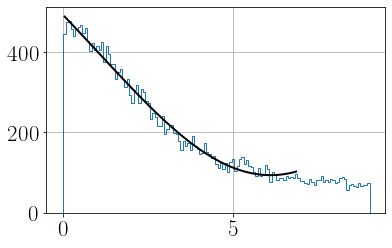

In [132]:
pi0SimOutb_forDVCS_FD.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [133]:
ub_opt

11.316057679031708

In [135]:
pi0SimOutb_forDVCS_FD = pi0SimOutb_forDVCS_FD.loc[pi0SimOutb_forDVCS_FD.coplanarity < 11.316]

In [136]:
pi0SimOutb_forDVCS_FD.MM2_epgg.mean()+3*pi0SimOutb_forDVCS_FD.MM2_epgg.std()

0.03542283028064316

In [137]:
pi0SimOutb_forDVCS_FD.MM2_epgg.mean()-3*pi0SimOutb_forDVCS_FD.MM2_epgg.std()

-0.04803842574943019

In [138]:
pi0SimOutb_forDVCS_FD = pi0SimOutb_forDVCS_FD.loc[(pi0SimOutb_forDVCS_FD.MM2_epgg>-0.0480) & (pi0SimOutb_forDVCS_FD.MM2_epgg<0.0354)]

In [139]:
len(pi0SimOutb_forDVCS_FD)

26681

In [140]:
pi0SimOutb_forDVCS_CD = pi0SimOutb_forDVCS.loc[pi0SimOutb_forDVCS.config == 2]

In [143]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CD.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CD.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.0 12558.455044643053 95
0.2213503147150726 105.26824440775549 95
[ 1.35330780e-01  1.11433470e-02  1.54776294e+02 -2.31231800e+03
  8.61638944e+03] 0.11700160561113186 0.15365995511564606 0.2213503147150726
0.8532904327023924 80.6372248510487 95
[ 1.35378943e-01  1.07688353e-02  1.55259074e+02 -2.28585632e+03
  8.49369445e+03] 0.11766578488020497 0.15309210060855474 0.8532904327023924
0.8294977450301686 81.86001241467415 95
0.9226317082092451 76.12509056817183 95
[ 1.35406676e-01  1.07714427e-02  1.25652110e+02 -1.83400928e+03
  6.80585870e+03] 0.1176892295177086 0.15312412275758064 0.9226317082092451
0.9312408561868207 75.38964989202483 95
[ 1.35408035e-01  1.07687003e-02  1.26247498e+02 -1.84254116e+03
  6.83659782e+03] 0.11769509904931312 0.15312097044139167 0.9312408561868207
0.9190813606499647 76.41157663905 95
0.9561422040313196 72.79447614669678 95
[ 1.35405390e-01  1.07639595e-02  1.28248206e+02 -1.87286827e+03
  6.95041821e+03] 0.1177002518081585 0.15311052751288945 0.956142

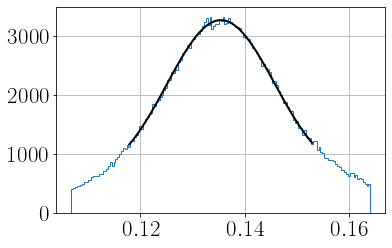

In [144]:
pi0SimOutb_forDVCS_CD.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [145]:
print(ub_opt, lb_opt)

0.16770878697657704 0.10310547563894208


In [146]:
pi0SimOutb_forDVCS_CD = pi0SimOutb_forDVCS_CD.loc[(pi0SimOutb_forDVCS_CD.Mpi0<0.168) & (pi0SimOutb_forDVCS_CD.Mpi0>0.103)]

In [147]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CD.MM2_egg, bins = np.linspace(0, 2, 101))
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CD.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


1.1102230246251565e-16 255.69250926410362 95
[ 0.88169333  0.44728768 -0.00429128 -0.05756658  0.05784873] 0.1459705710509408 1.6174160909333168 1.1102230246251565e-16
0.07577166881915398 115.41445731962061 95
[ 0.87142673  0.41418171  0.06367479 -0.1588418   0.13349127] 0.19015844413867766 1.5526950122855623 0.07577166881915398
0.22969964493456718 104.85825369210896 95
[ 0.86778809  0.40833001  0.07086009 -0.13712187  0.12966353] 0.19614499966434307 1.5394311866124122 0.22969964493456718
0.3245618192635644 100.71861890476147 95
[ 0.86671568  0.40645309  0.07583241 -0.14613345  0.13754024] 0.19815983659825387 1.5352715186178956 0.3245618192635644
0.5660070951548726 92.07078328787354 95
[ 0.86582891  0.40539853  0.0787934  -0.15646927  0.14546189] 0.19900766418926175 1.5326501551216871 0.5660070951548726
0.5813859185089805 91.54202996199771 95
[ 0.86547973  0.40472614  0.08118859 -0.16379331  0.15055539] 0.19976447489719995 1.5311949867847563 0.5813859185089805
0.7117940141844942 86.872

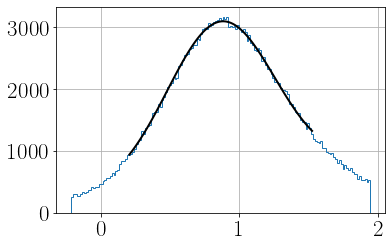

In [148]:
pi0SimOutb_forDVCS_CD.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [150]:
print(ub_opt, lb_opt)

2.0788556878798055 -0.3481196243798321


In [151]:
pi0SimOutb_forDVCS_CD = pi0SimOutb_forDVCS_CD.loc[(pi0SimOutb_forDVCS_CD.MM2_egg<2.079) & (pi0SimOutb_forDVCS_CD.MM2_egg>-0.348)]

In [152]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CD.ME_epgg, bins = np.linspace(-1, 1, 101))
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CD.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.95, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 3*scale
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.0 14693.255003819562 95
0.2403653510377033 104.34794118203935 95
[0.0047502  0.27779485 0.03774929 0.15151132 0.30028409] -0.4521816643162931 0.4616820579898747 0.2403653510377033
0.17961218079957242 107.48642518095714 95
0.5607752634506882 92.25030183504123 95
[0.00185109 0.27061021 0.08723887 0.19398959 0.32224619] -0.44326309849226275 0.4469652875840942 0.5607752634506882
0.29279237688881743 102.01844266938842 95
0.22912442658423626 104.8861934731843 95
0.3268335633685755 100.6282197414664 95
0.2851071466085572 102.34402802651469 95
0.3162623312679882 101.05159279475208 95
0.24392151194683853 104.18091992592906 95


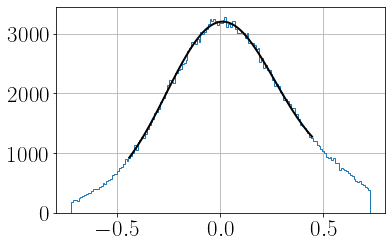

In [153]:
pi0SimOutb_forDVCS_CD.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [154]:
print(ub_opt, lb_opt)

0.8136817384612796 -0.8099795493694479


In [155]:
pi0SimOutb_forDVCS_CD = pi0SimOutb_forDVCS_CD.loc[(pi0SimOutb_forDVCS_CD.ME_epgg<0.814) & (pi0SimOutb_forDVCS_CD.ME_epgg>-0.810)]

In [156]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CD.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CD.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.01
    ub = loc+2.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.16683229042826087 0.01 0.1585768288297497
[ 4.16442089e+00  9.00467782e-03  5.98288604e-02 -2.66146674e+00
  7.23263002e+01 -3.17502314e+02] 0.01 0.1585768288297497 0.16683229042826087
0.686340798186788 0.01 0.1680088211457839
[ 4.47638707e+00  1.09481880e-02  6.28242532e-02 -1.09164871e+00
  3.48497920e+01 -1.44029565e+02] 0.01 0.1680088211457839 0.686340798186788
0.8719223508345142 0.01 0.1699210909931938
[ 4.51774625e+00  1.10667640e-02  6.35417308e-02 -9.86893813e-01
  2.97779418e+01 -1.18020872e+02] 0.01 0.1699210909931938 0.8719223508345142
0.8516328351780236 0.01 0.1706769165757151
0.19100530820825679 0.01 0.1705863527386157
0.1963877261236917 0.01 0.17059400467380834
0.1675089490130871 0.01 0.17060728918831866
0.17032042722507013 0.01 0.17059295697149515
0.17069960489119929 0.01 0.17061288976842728
0.19105379665445432 0.01 0.1705994141406783


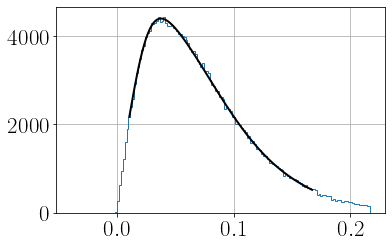

In [157]:
pi0SimOutb_forDVCS_CD.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [158]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.2024197480243026

In [159]:
pi0SimOutb_forDVCS_CD = pi0SimOutb_forDVCS_CD.loc[(pi0SimOutb_forDVCS_CD.MPt<0.202)]

In [160]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CD.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CD.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.0 0.002 1.4916231017528616
5.923202084368029e-08 0.002 1.3492615799078613
[ 3.69552088  0.05738918  0.43062413 -0.53271369  1.37709781 -0.62840738] 0.002 1.3492615799078613 5.923202084368029e-08
0.00018633314194238526 0.002 1.300639883627293
[ 3.41069918  0.0542836   0.4154521  -0.58738761  1.65352337 -0.80955702] 0.002 1.300639883627293 0.00018633314194238526
0.005360024950260778 0.002 1.281920368502999
[ 3.32143651  0.05268744  0.40974431 -0.61249399  1.78404328 -0.89924089] 0.002 1.281920368502999 0.005360024950260778
0.003657607036449795 0.002 1.2738378836083701
0.00020862811091015843 0.002 1.2726991735701256
0.0005650599354216634 0.002 1.2726795608058423
0.0004836032443289451 0.002 1.2726146752023473
0.0006194750726897791 0.002 1.2724506268193763
0.0004069273290016051 0.002 1.272494413880237


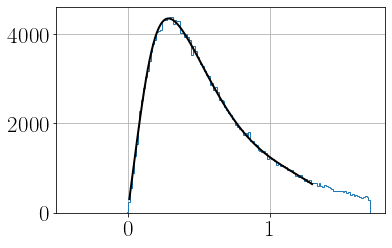

In [161]:
pi0SimOutb_forDVCS_CD.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [162]:
skewnorm.ppf(0.9974, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.2866134808616616

In [163]:
pi0SimOutb_forDVCS_CD = pi0SimOutb_forDVCS_CD.loc[(pi0SimOutb_forDVCS_CD.reconPi<1.287)]

In [169]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CD.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CD.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 6.672864353191313 0.0
0 7.15875233163847 0.01610799844310684
[ 2.86350093e+00  1.07994139e-03 -3.34851854e-03  8.79760115e-04] 0 7.15875233163847 0.01610799844310684
0 7.29228618754431 0.0003389529795339019
0 7.321298321849605 2.912400908772206e-06
0 7.33055294037113 1.0422026083256597e-06
0 7.332938537446978 2.233991447386785e-08
0 7.334574356362094 1.6522902268611972e-08
0 7.3353334106986505 2.440761537325642e-08
0 7.335230180345347 2.1313768083786044e-08
0 7.335565163184215 1.965651863500284e-08


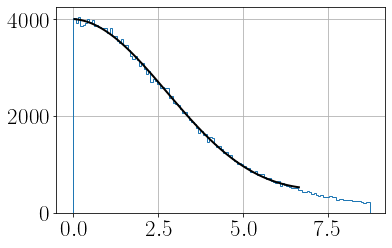

In [170]:
pi0SimOutb_forDVCS_CD.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [171]:
print(ub_opt)

8.642786601563413


In [173]:
pi0SimOutb_forDVCS_CD = pi0SimOutb_forDVCS_CD.loc[pi0SimOutb_forDVCS_CD.coplanarity<8.643]

In [174]:
pi0SimOutb_forDVCS_CD.MM2_epgg.mean()-3*pi0SimOutb_forDVCS_CD.MM2_epgg.std()

-0.030160344793004463

In [175]:
pi0SimOutb_forDVCS_CD.MM2_epgg.mean()+3*pi0SimOutb_forDVCS_CD.MM2_epgg.std()

0.025665820206689328

In [176]:
pi0SimOutb_forDVCS_CD = pi0SimOutb_forDVCS_CD.loc[(pi0SimOutb_forDVCS_CD.MM2_epgg>-0.0302) & (pi0SimOutb_forDVCS_CD.MM2_epgg<0.0257)]

In [194]:
pi0SimOutb_forDVCS_CDFT = pi0SimOutb_forDVCS.loc[pi0SimOutb_forDVCS.config == 3]

In [195]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CDFT.Mpi0, bins = np.linspace(0.1, 0.2, 101))
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CDFT.Mpi0, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0.13, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.01, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)


0.0 4374.731581478714 95
0.0 439.44357210611105 95
0.000708967599942989 145.17038480488895 95
[ 1.37204425e-01  5.13304182e-03  2.12867915e+03 -3.04748154e+04
  1.08682627e+05] 0.12526318406208964 0.14914566590764322 0.000708967599942989
0.07044750880861617 116.01730894881227 95
[ 1.37337964e-01  4.86047726e-03  2.86374355e+03 -4.09707711e+04
  1.46149362e+05] 0.1260308027787167 0.14864512464801516 0.07044750880861617
0.12888261075576946 110.73432318796091 95
[ 1.37354845e-01  4.77319369e-03  3.10146032e+03 -4.43754462e+04
  1.58363810e+05] 0.12625073579706472 0.14845895377677706 0.12888261075576946
0.13813018200453764 110.08022933669848 95
[ 1.37364768e-01  4.74225517e-03  3.21178894e+03 -4.59602788e+04
  1.64059266e+05] 0.12633263266750852 0.14839690313009365 0.13813018200453764
0.2843780557416826 102.37516639070077 95
[ 1.37375337e-01  4.71858905e-03  3.35082539e+03 -4.79683789e+04
  1.71299780e+05] 0.1263982576843189 0.14835241691289047 0.2843780557416826
0.06050822802690903 117.25

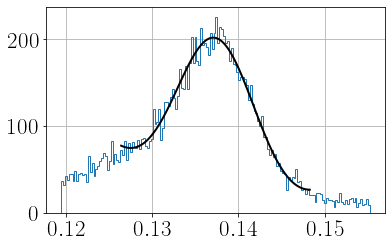

In [196]:
pi0SimOutb_forDVCS_CDFT.Mpi0.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [197]:
print(ub_opt, lb_opt)

0.16096828256869172 0.11378239202851764


In [198]:
pi0SimOutb_forDVCS_CDFT = pi0SimOutb_forDVCS_CDFT.loc[(pi0SimOutb_forDVCS_CDFT.Mpi0<0.161) & (pi0SimOutb_forDVCS_CDFT.Mpi0>0.114)]

In [199]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CDFT.MM2_egg, bins = np.linspace(0.5, 1.5, 101))
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CDFT.MM2_egg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [1, 0.5, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.99, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.6626636151110246 88.68890569557615 95
[ 0.88042866  0.2541544  -0.57596844  0.62431892  0.02422179] 0.46238186578380813 1.4716802201840053 0.6626636151110246
0.6051987300218311 90.71857569859026 95
0.625907212032949 89.99557714514495 95
0.5092210334696798 94.01720448476578 95
0.35314814635639635 99.60224128844916 95
0.41837535527722725 97.19111404677032 95
0.4971354042468732 94.43277704010778 95
0.3350796587478734 100.30263821342065 95
0.4467433851067969 96.18416663597311 95
0.4453429047073628 96.23344463467605 95


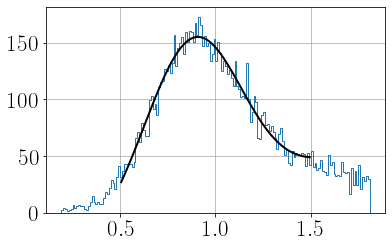

In [200]:
pi0SimOutb_forDVCS_CDFT.MM2_egg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [201]:
print(ub_opt, lb_opt)


2.151200685286285 -0.3903433641607056


In [202]:
pi0SimOutb_forDVCS_CDFT = pi0SimOutb_forDVCS_CDFT.loc[(pi0SimOutb_forDVCS_CDFT.MM2_egg<2.151) & (pi0SimOutb_forDVCS_CDFT.MM2_egg>-0.390)]

In [203]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CDFT.ME_epgg, bins = np.linspace(-.5, .5, 101))
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CDFT.ME_epgg, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_normfit, [0, 0.05, 0, 0, 0], args=(bincenters, hist))
    loc, scale, a, b, c = res_lsq.x
    lb = norm.ppf(0.05, loc = loc, scale = scale)
    ub = norm.ppf(0.995, loc = loc, scale = scale)
    pvalue, chi2fit, dof = probFit(dist, bins,  normfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, chi2fit, dof)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = loc - 5*scale
        ub_opt = loc + 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 inf 95
0.02952718525653053 122.67595301218287 95
[ 0.00416978  0.17623774 -0.02815521  1.52412747 -0.63261894] -0.2857155066168076 0.4581281218230623 0.02952718525653053
0.053112329316064355 118.28143844375973 95
[ 0.01053874  0.17428917 -0.05603659  1.2176522   0.3336198 ] -0.2761414417072234 0.45947789810953693 0.053112329316064355
0.033092944399683355 121.85126895209775 95
0.006818565850916669 132.36571252776415 95
0.0005226626421119818 146.76111660641232 95
0.0004896347902458853 147.09839716894737 95
0.0010407821447692145 143.12889181384506 95
0.002968980224231088 137.30443787456483 95
0.001011182310998393 143.2838754441293 95


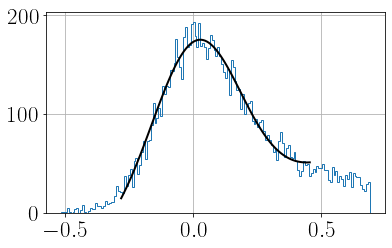

In [204]:
pi0SimOutb_forDVCS_CDFT.ME_epgg.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, normfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [205]:
print(ub_opt, lb_opt)

0.8819846053629725 -0.8609071302395184


In [206]:
pi0SimOutb_forDVCS_CDFT = pi0SimOutb_forDVCS_CDFT.loc[(pi0SimOutb_forDVCS_CDFT.ME_epgg<0.882) & (pi0SimOutb_forDVCS_CDFT.ME_epgg>-0.861)]

In [207]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CDFT.MPt, bins = np.linspace(0.005, 0.15, 101))
        params = [1, 0, 0.03, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CDFT.MPt, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = 0
        ub_opt = loc + 3*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0.7821337913022108 0.002 0.1355567246114788
[ 3.98128881e+00  8.31831659e-03  4.24128027e-02 -2.49652132e+00
  7.04524171e+01 -3.35971703e+02] 0.002 0.1355567246114788 0.7821337913022108
0.0801642925097974 0.002 0.13436158470875204
0.16181180298503128 0.002 0.1355558929826236
0.0811518719549742 0.002 0.13433900078043318
0.29272008451965115 0.002 0.13563419678771446
0.14818920033684535 0.002 0.1344522463181699
0.31821982976371777 0.002 0.1355135346893958
0.14216096517987542 0.002 0.1344909184127388
0.2714158670725372 0.002 0.13552505279841087
0.1451372709596922 0.002 0.13452522458329538


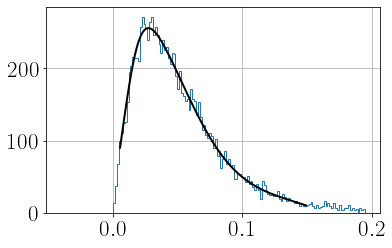

In [208]:
pi0SimOutb_forDVCS_CDFT.MPt.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()


In [209]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

0.22038232995718346

In [210]:
pi0SimOutb_forDVCS_CDFT = pi0SimOutb_forDVCS_CDFT.loc[(pi0SimOutb_forDVCS_CDFT.MPt<0.220)]

In [211]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CDFT.reconPi, bins = np.linspace(0.005, 2, 101))
        params = [1, 0, 0.3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CDFT.reconPi, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_skewnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    a, loc, scale, b, c, d = params
    lb = 0.002
    ub = loc+3*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  skewnormfit(res_lsq.x, bincenters), res_lsq)
    print(pvalue, lb, ub)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = ub
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

<ipython-input-22-c9c473faa9ff>:5: RuntimeWarning: divide by zero encountered in true_divide
  chi2fit = np.sum((hist - fit)**2/unchist**2)


0.0 0.002 1.103841814092543
0.20774277207039626 0.002 0.9326851700076406
[ 3.58329176  0.04864827  0.29467897 -0.65355776  2.37555576 -1.53749509] 0.002 0.9326851700076406 0.20774277207039626
0.8389944615694513 0.002 0.853768460370128
[ 2.89102304  0.04183752  0.27064365 -0.8907226   3.82305093 -2.86803919] 0.002 0.853768460370128 0.8389944615694513
0.8335144826667622 0.002 0.8199116628797785
0.986302955163316 0.002 0.769355515597149
[ 2.19933688  0.03547475  0.24462692 -1.16997805  5.78438446 -4.88850154] 0.002 0.769355515597149 0.986302955163316
0.9966883729439405 0.002 0.7039162978646826
[ 1.65236699  0.0349914   0.22297497 -1.3704028   7.39809043 -6.69872375] 0.002 0.7039162978646826 0.9966883729439405
0.9756529923673144 0.002 0.7260056508821354
0.984223136345614 0.002 0.7166041135779183
0.9908842402612325 0.002 0.7399704139405205
0.96266664459041 0.002 0.6849052895523434


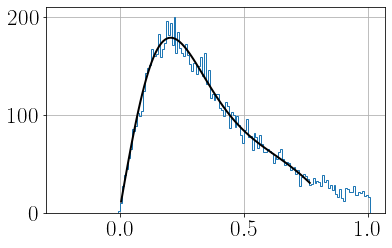

In [212]:
pi0SimOutb_forDVCS_CDFT.reconPi.hist(bins = extendedBins(bins_opt, 30, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.4, 0.4, 100)
plt.plot(bincenters_opt, skewnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [213]:
skewnorm.ppf(0.999999426696856, a = params_opt[0], loc = params_opt[1], scale = params_opt[2])

1.1498662308790482

In [214]:
pi0SimOutb_forDVCS_CDFT = pi0SimOutb_forDVCS_CDFT.loc[(pi0SimOutb_forDVCS_CDFT.reconPi<1.150)]

In [215]:
pvalue_opt = 0
for i in range(0, 10):
    if i == 0:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CDFT.coplanarity, bins = np.linspace(0, 10, 101))
        params = [3, 0, 0, 0]
    else:
        dist, bins = np.histogram(pi0SimOutb_forDVCS_CDFT.coplanarity, bins = np.linspace(lb, ub, 101))
    bincenters = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])
    hist = dist/np.sum(dist)/np.diff(bincenters)[0]
    res_lsq = least_squares(lstsq_halfnormfit, params, args=(bincenters, hist))
    params = res_lsq.x
    scale, a, b, c = params
    lb = 0
    ub = 2.5*scale
    pvalue, chi2fit, dof = probFit(dist, bins,  halfnormfit(res_lsq.x, bincenters), res_lsq)
    print(lb, ub, pvalue)
    if pvalue>pvalue_opt:
        pvalue_opt = pvalue
        bins_opt = bins
        bincenters_opt = bincenters
        params_opt = res_lsq.x
        lb_opt = lb
        ub_opt = 5*scale
        dist_opt = dist
        print(params_opt, lb, ub, pvalue)

0 6.761977362933102 0.0006664190144318738
[ 2.70479095e+00 -4.75448840e-02  1.82425956e-02 -1.30942199e-03] 0 6.761977362933102 0.0006664190144318738
0 6.785451412410328 0.33370208164924753
[ 2.71418056e+00 -2.91396578e-02  1.32100074e-02 -8.95055670e-04] 0 6.785451412410328 0.33370208164924753
0 6.783200553011897 0.006248725672107991
0 6.779146962776662 0.021600237194291716
0 6.768137444814225 0.06737449763322911
0 6.777758766008018 0.1457522908800719
0 6.767666380233291 0.06251963293278051
0 6.781435610921992 0.15814666106779762
0 6.769500154803687 0.06644791473228107
0 6.7811130682957 0.2018662692910106


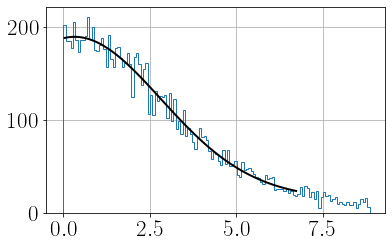

In [216]:
pi0SimOutb_forDVCS_CDFT.coplanarity.hist(bins = extendedBins(bins_opt, 0, 30), histtype = 'step')

# df = 4.5
# scale = 0.065
# x = np.linspace(-0.04, 0.04, 100)
# plt.plot(bincenters, crystalballfit(res_lsq.x, bincenters), 'k-', lw=2, label='frozen pdf')
plt.plot(bincenters_opt, halfnormfit(params_opt, bincenters_opt)*np.sum(dist_opt)*np.diff(bincenters_opt)[0], 'k-', lw=2, label='frozen pdf')
plt.show()

In [217]:
print(ub_opt)

13.570902824820656


In [220]:
pi0SimOutb_forDVCS_CDFT = pi0SimOutb_forDVCS_CDFT.loc[pi0SimOutb_forDVCS_CDFT.coplanarity<13.571]

In [221]:
pi0SimOutb_forDVCS_CDFT.MM2_epgg.mean()+5*pi0SimOutb_forDVCS_CDFT.MM2_epgg.std()

0.04132551367865748

In [222]:
pi0SimOutb_forDVCS_CDFT.MM2_epgg.mean()-5*pi0SimOutb_forDVCS_CDFT.MM2_epgg.std()

-0.043982664015469

In [224]:
pi0SimOutb_forDVCS_CDFT = pi0SimOutb_forDVCS_CDFT.loc[(pi0SimOutb_forDVCS_CDFT.MM2_epgg<0.0413) & (pi0SimOutb_forDVCS_CDFT.MM2_epgg>-0.0440)]

In [225]:
len(pi0SimOutb_forDVCS_CDFT)

11149

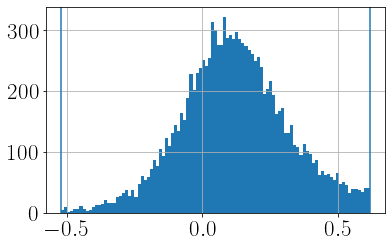

In [113]:
pi0SimOutb_forDVCS_CDFT.MM2_ep.hist(bins = 101)
plt.axvline(0.617)
plt.axvline(-0.521)
plt.show()

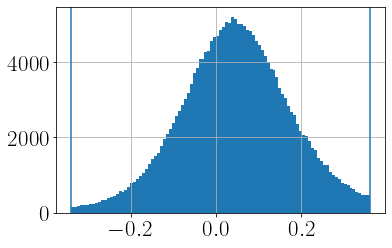

In [115]:
pi0SimOutb_forDVCS_CD.MM2_ep.hist(bins = 101)
plt.axvline(0.362)
plt.axvline(-0.340)
plt.show()

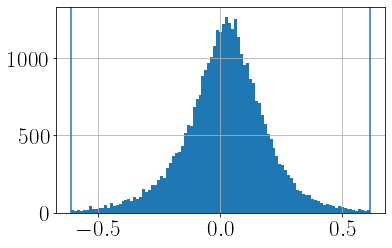

In [116]:
pi0SimOutb_forDVCS_FD.MM2_ep.hist(bins = 101)
plt.axvline(0.614)
plt.axvline(-0.612)
plt.show()

In [101]:
cut_Pp1_FD = epgg_4240.Pp > 0.42  # Pp
cut_Psector_FD = epgg_4240.Psector<7
cut_Ptheta_FD = epgg_4240.Ptheta>2.477
cut_Gsector_FD = epgg_4240.Gsector<7
cut_mmep1_FD = epgg_4240["MM2_ep"] < 0.6  # mmep
cut_mmep2_FD = epgg_4240["MM2_ep"] > -0.6  # mmep
cut_mpi01_FD = epgg_4240["Mpi0"] < 0.167  # mpi0
cut_mpi02_FD = epgg_4240["Mpi0"] > 0.105  # mpi0
cut_mmegg1_FD = epgg_4240["MM2_egg"] < 1.801  # mmegg
cut_mmegg2_FD = epgg_4240["MM2_egg"] > -0.120  # mmegg
cut_meepgg1_FD = epgg_4240["ME_epgg"] < 0.792  # meepgg
cut_meepgg2_FD = epgg_4240["ME_epgg"] > -0.813  # meepgg
cut_mpt_FD = epgg_4240["MPt"] < 0.217  # mpt
cut_recon_FD = epgg_4240["reconPi"] < 1.182  # recon gam angle
cut_mmepgg1_FD = np.abs(epgg_4240["MM2_epgg"]) < 0.0254  # mmepgg
cut_mmepgg2_FD = np.abs(epgg_4240["MM2_epgg"]) > -0.0299  # mmepgg

cut_FD = (cut_Pp1_FD & cut_Psector_FD & cut_Ptheta_FD & cut_Gsector_FD &
            cut_mmep1_FD & cut_mmep2_FD & cut_mpi01_FD & cut_mpi02_FD & 
            cut_mmegg1_FD & cut_mmegg2_FD & cut_meepgg1_FD & cut_meepgg2_FD &
            cut_mpt_FD & cut_recon_FD & cut_mmepgg1_FD & cut_mmepgg2_FD)


#CDFT
cut_Pp1_CDFT = epgg_4240.Pp > 0.3  # Pp
cut_Psector_CDFT = epgg_4240.Psector>7
cut_Ptheta_CDFT = epgg_4240.Ptheta<60
cut_Gsector_CDFT = epgg_4240.Gsector>7
cut_mmep1_CDFT = epgg_4240["MM2_ep"] < 0.6  # mmep
cut_mmep2_CDFT = epgg_4240["MM2_ep"] > -0.6  # mmep
cut_mpi01_CDFT = epgg_4240["Mpi0"] < 0.161  # mpi0
cut_mpi02_CDFT = epgg_4240["Mpi0"] > 0.114  # mpi0
cut_mmegg1_CDFT = epgg_4240["MM2_egg"] < 2.134  # mmegg
cut_mmegg2_CDFT = epgg_4240["MM2_egg"] > -0.364  # mmegg
cut_meepgg1_CDFT = epgg_4240["ME_epgg"] < 0.885  # meepgg
cut_meepgg2_CDFT = epgg_4240["ME_epgg"] > -0.869  # meepgg
cut_mpt_CDFT = epgg_4240["MPt"] < 0.194  # mpt
cut_recon_CDFT = epgg_4240["reconPi"] < 1.481  # recon gam angle
cut_mmepgg1_CDFT = np.abs(epgg_4240["MM2_epgg"]) < 0.0396  # mmepgg
cut_mmepgg2_CDFT = np.abs(epgg_4240["MM2_epgg"]) > -0.0433  # mmepgg

cut_CDFT = (cut_Pp1_CDFT & cut_Psector_CDFT & cut_Ptheta_CDFT & cut_Gsector_CDFT &
            cut_mmep1_CDFT & cut_mmep2_CDFT & cut_mpi01_CDFT & cut_mpi02_CDFT & 
            cut_mmegg1_CDFT & cut_mmegg2_CDFT & cut_meepgg1_CDFT & cut_meepgg2_CDFT &
            cut_mpt_CDFT & cut_recon_CDFT & cut_mmepgg1_CDFT & cut_mmepgg2_CDFT)


#CD
cut_Pp1_CD = epgg_4240.Pp > 0.3  # Pp
cut_Psector_CD = epgg_4240.Psector>7
cut_Ptheta_CD = epgg_4240.Ptheta<60
cut_Gsector_CD = epgg_4240.Gsector<7
cut_mmep1_CD = epgg_4240["MM2_ep"] < 0.6  # mmep
cut_mmep2_CD = epgg_4240["MM2_ep"] > -0.6  # mmep
cut_mpi01_CD = epgg_4240["Mpi0"] < 0.165  # mpi0
cut_mpi02_CD = epgg_4240["Mpi0"] > 0.105  # mpi0
cut_mmegg1_CD = epgg_4240["MM2_egg"] < 2.098  # mmegg
cut_mmegg2_CD = epgg_4240["MM2_egg"] > -0.305  # mmegg
cut_meepgg1_CD = epgg_4240["ME_epgg"] < 0.895  # meepgg
cut_meepgg2_CD = epgg_4240["ME_epgg"] > -0.845  # meepgg
cut_mpt_CD = epgg_4240["MPt"] < 0.196  # mpt
cut_recon_CD = epgg_4240["reconPi"] < 1.101  # recon gam angle
cut_mmepgg1_CD = np.abs(epgg_4240["MM2_epgg"]) < 0.0324  # mmepgg
cut_mmepgg2_CD = np.abs(epgg_4240["MM2_epgg"]) > -0.0276  # mmepgg

cut_CD = (cut_Pp1_CD & cut_Psector_CD & cut_Ptheta_CD & cut_Gsector_CD &
            cut_mmep1_CD & cut_mmep2_CD & cut_mpi01_CD & cut_mpi02_CD & 
            cut_mmegg1_CD & cut_mmegg2_CD & cut_meepgg1_CD & cut_meepgg2_CD &
            cut_mpt_CD & cut_recon_CD & cut_mmepgg1_CD & cut_mmepgg2_CD)


In [102]:
sum(cut_CDFT), sum(cut_CD), sum(cut_FD)

(473, 839, 21)